## Telecom Churn Case Study

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



### Understanding the Business Objective
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful

### Reading & Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report,confusion_matrix
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
sns.set_style("whitegrid")

In [3]:
# Reading the data set
telecom = pd.read_csv("D:/Sushma/Data Science/Machine Learning/Telecom Churn Case Study/telecom_churn_data.csv")

In [4]:
#Checking the head of the data set
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#Checking the info of the data set
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#Checking the shape of the data set
telecom.shape

(99999, 226)

In [7]:
# Checking for null values in the columns
telecom.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [8]:
# Checking the column-wise null percentages here

round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [9]:
#Checking the null percentage of the column
round(100*(telecom['total_rech_data_6'].isnull().sum()/len(telecom.index)),2)

74.85

In [10]:
#Checking the null percentage of the column
round(100*(telecom['av_rech_amt_data_6'].isnull().sum()/len(telecom.index)),2)

74.85

In [11]:
#Checking the null percentage of the column
round(100*(telecom['total_rech_data_7'].isnull().sum()/len(telecom.index)),2)

74.43

In [12]:
#Checking the null percentage of the column
round(100*(telecom['av_rech_amt_data_7'].isnull().sum()/len(telecom.index)),2)

74.43

In [13]:
round(100*(telecom['total_rech_data_8'].isnull().sum()/len(telecom.index)),2)

73.66

In [14]:
#Checking the null percentage of the column
round(100*(telecom['av_rech_amt_data_8'].isnull().sum()/len(telecom.index)),2)

73.66

In [15]:
#Checking the null percentage of the column
round(100*(telecom['total_rech_data_9'].isnull().sum()/len(telecom.index)),2)

74.08

In [16]:
#Checking the null percentage of the column
round(100*(telecom['av_rech_amt_data_9'].isnull().sum()/len(telecom.index)),2)

74.08

In [17]:
#Checking the shape of the data set
telecom.shape

(99999, 226)

In [18]:
#Imputing zero for null values
telecom["total_rech_data_6"].fillna(0, inplace = True)
telecom["total_rech_data_7"].fillna(0, inplace = True)

telecom["av_rech_amt_data_6"].fillna(0, inplace = True)
telecom["av_rech_amt_data_7"].fillna(0, inplace = True)

In [19]:
#Calculating totol data recharge amount for all the months
telecom['total_data_rech_6']=telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_data_rech_7']=telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']
telecom['total_data_rech_8']=telecom['total_rech_data_8']*telecom['av_rech_amt_data_8']
telecom['total_data_rech_9']=telecom['total_rech_data_9']*telecom['av_rech_amt_data_9']

In [20]:
#Checking the shape of the data set
telecom.shape

(99999, 230)

In [21]:
#Calculating totol recharge amount for all the months
telecom['total_rech_6']=telecom['total_data_rech_6']+telecom['total_rech_amt_6']
telecom['total_rech_7']=telecom['total_data_rech_7']+telecom['total_rech_amt_7']


In [22]:
#Checking the shape of the data set
telecom.shape

(99999, 232)

In [23]:
#Calculating the average recharge amount for 6th and 7th months
telecom['avg_rech_good_phase']=telecom[['total_rech_6','total_rech_7']].mean(axis=1)

In [24]:
#Checking the shape of the data set
telecom.shape

(99999, 233)

In [25]:
#Calculating the threshold for filtering high value customers
high_value = telecom['avg_rech_good_phase'].quantile(0.7)
print(high_value)

478.0


In [26]:
#Filtering and retaining only the high value customers
telecom=telecom.loc[(telecom['avg_rech_good_phase'] >=high_value)]

In [27]:
#Checking the shape of the data set
telecom.shape

(30001, 233)

In [28]:
#Creating a new column 'churned' and tagging the customers as churned based on their usage
telecom['churned'] = 0
telecom.loc[((telecom['total_ic_mou_9'] == 0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0)),'churned']=1

In [29]:
#Checking the value counts of the column
telecom['churned'].value_counts()

0    27560
1     2441
Name: churned, dtype: int64

In [30]:
#Checking the churn ratio
churn_ratio = (sum(telecom['churned'])/len(telecom['churned'].index))*100
churn_ratio

8.136395453484884

In [31]:
#Removing all columns related to 9th month from the data set for further analysis
telecom.drop(telecom.filter(regex='_9').columns, axis=1,inplace=True)

In [32]:
# Checking the column-wise null percentages
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

date_of_last_rech_data_8    46.83
count_rech_2g_8             46.83
arpu_2g_8                   46.83
arpu_3g_8                   46.83
av_rech_amt_data_8          46.83
count_rech_3g_8             46.83
night_pck_user_8            46.83
fb_user_8                   46.83
total_data_rech_8           46.83
total_rech_data_8           46.83
max_rech_data_8             46.83
count_rech_2g_6             44.15
arpu_2g_6                   44.15
max_rech_data_6             44.15
arpu_3g_6                   44.15
date_of_last_rech_data_6    44.15
night_pck_user_6            44.15
fb_user_6                   44.15
count_rech_3g_6             44.15
date_of_last_rech_data_7    43.15
arpu_3g_7                   43.15
max_rech_data_7             43.15
count_rech_3g_7             43.15
arpu_2g_7                   43.15
count_rech_2g_7             43.15
night_pck_user_7            43.15
fb_user_7                   43.15
std_og_t2m_mou_8             3.91
ic_others_8                  3.91
isd_og_mou_8  

### Data Visualization

In [33]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

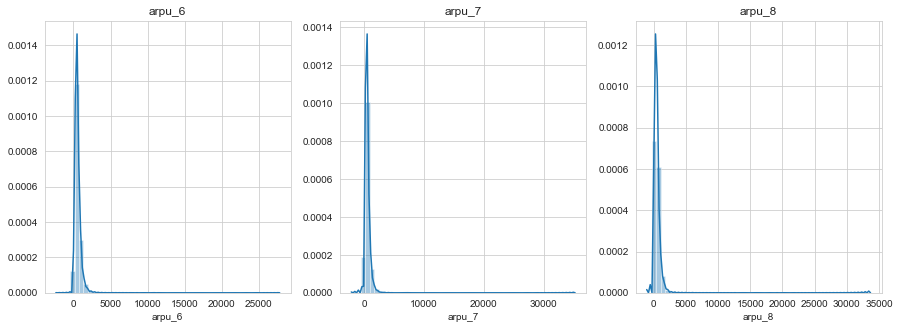

In [34]:
# subplots
plt.figure(figsize=[15,5])
# subplot 1
plt.subplot(1, 3, 1)
plt.title('arpu_6')
sns.distplot(telecom["arpu_6"])

# subplot 2
plt.subplot(1, 3, 2)
plt.title("arpu_7")
sns.distplot(telecom["arpu_7"])

# subplot 3
plt.subplot(1, 3, 3)
plt.title("arpu_8")
sns.distplot(telecom["arpu_8"])

plt.show()

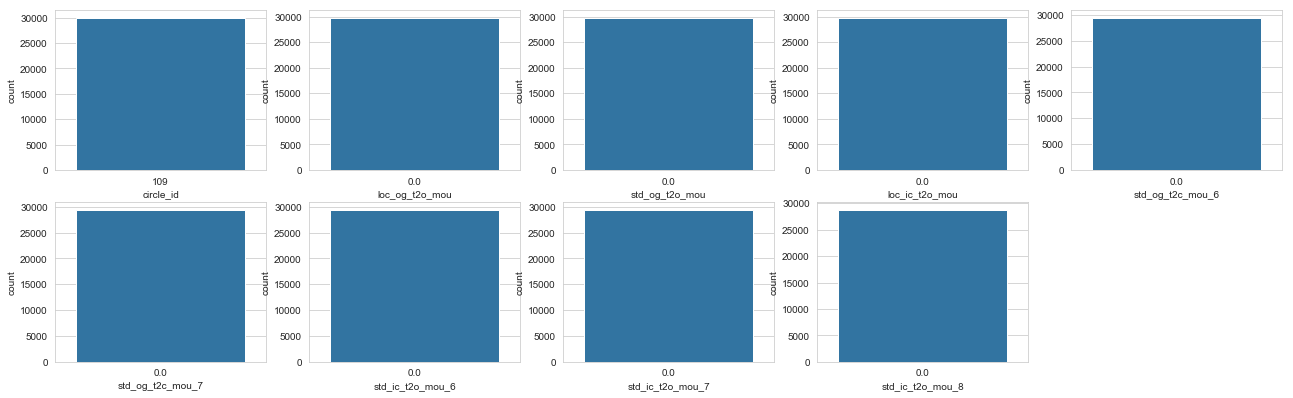

In [35]:
plt.figure(figsize=(22,70))
plt.subplot(20,5,1)
sns.countplot(telecom['circle_id'])
plt.subplot(20,5,2)
sns.countplot(telecom['loc_og_t2o_mou'])
plt.subplot(20,5,3)
sns.countplot(telecom['std_og_t2o_mou'])
plt.subplot(20,5,4)
sns.countplot(telecom['loc_ic_t2o_mou'])
plt.subplot(20,5,5)
sns.countplot(telecom['std_og_t2c_mou_6'])
plt.subplot(20,5,6)
sns.countplot(telecom['std_og_t2c_mou_7'])
plt.subplot(20,5,7)
sns.countplot(telecom['std_ic_t2o_mou_6'])
plt.subplot(20,5,8)
sns.countplot(telecom['std_ic_t2o_mou_7'])
plt.subplot(20,5,9)
sns.countplot(telecom['std_ic_t2o_mou_8'])

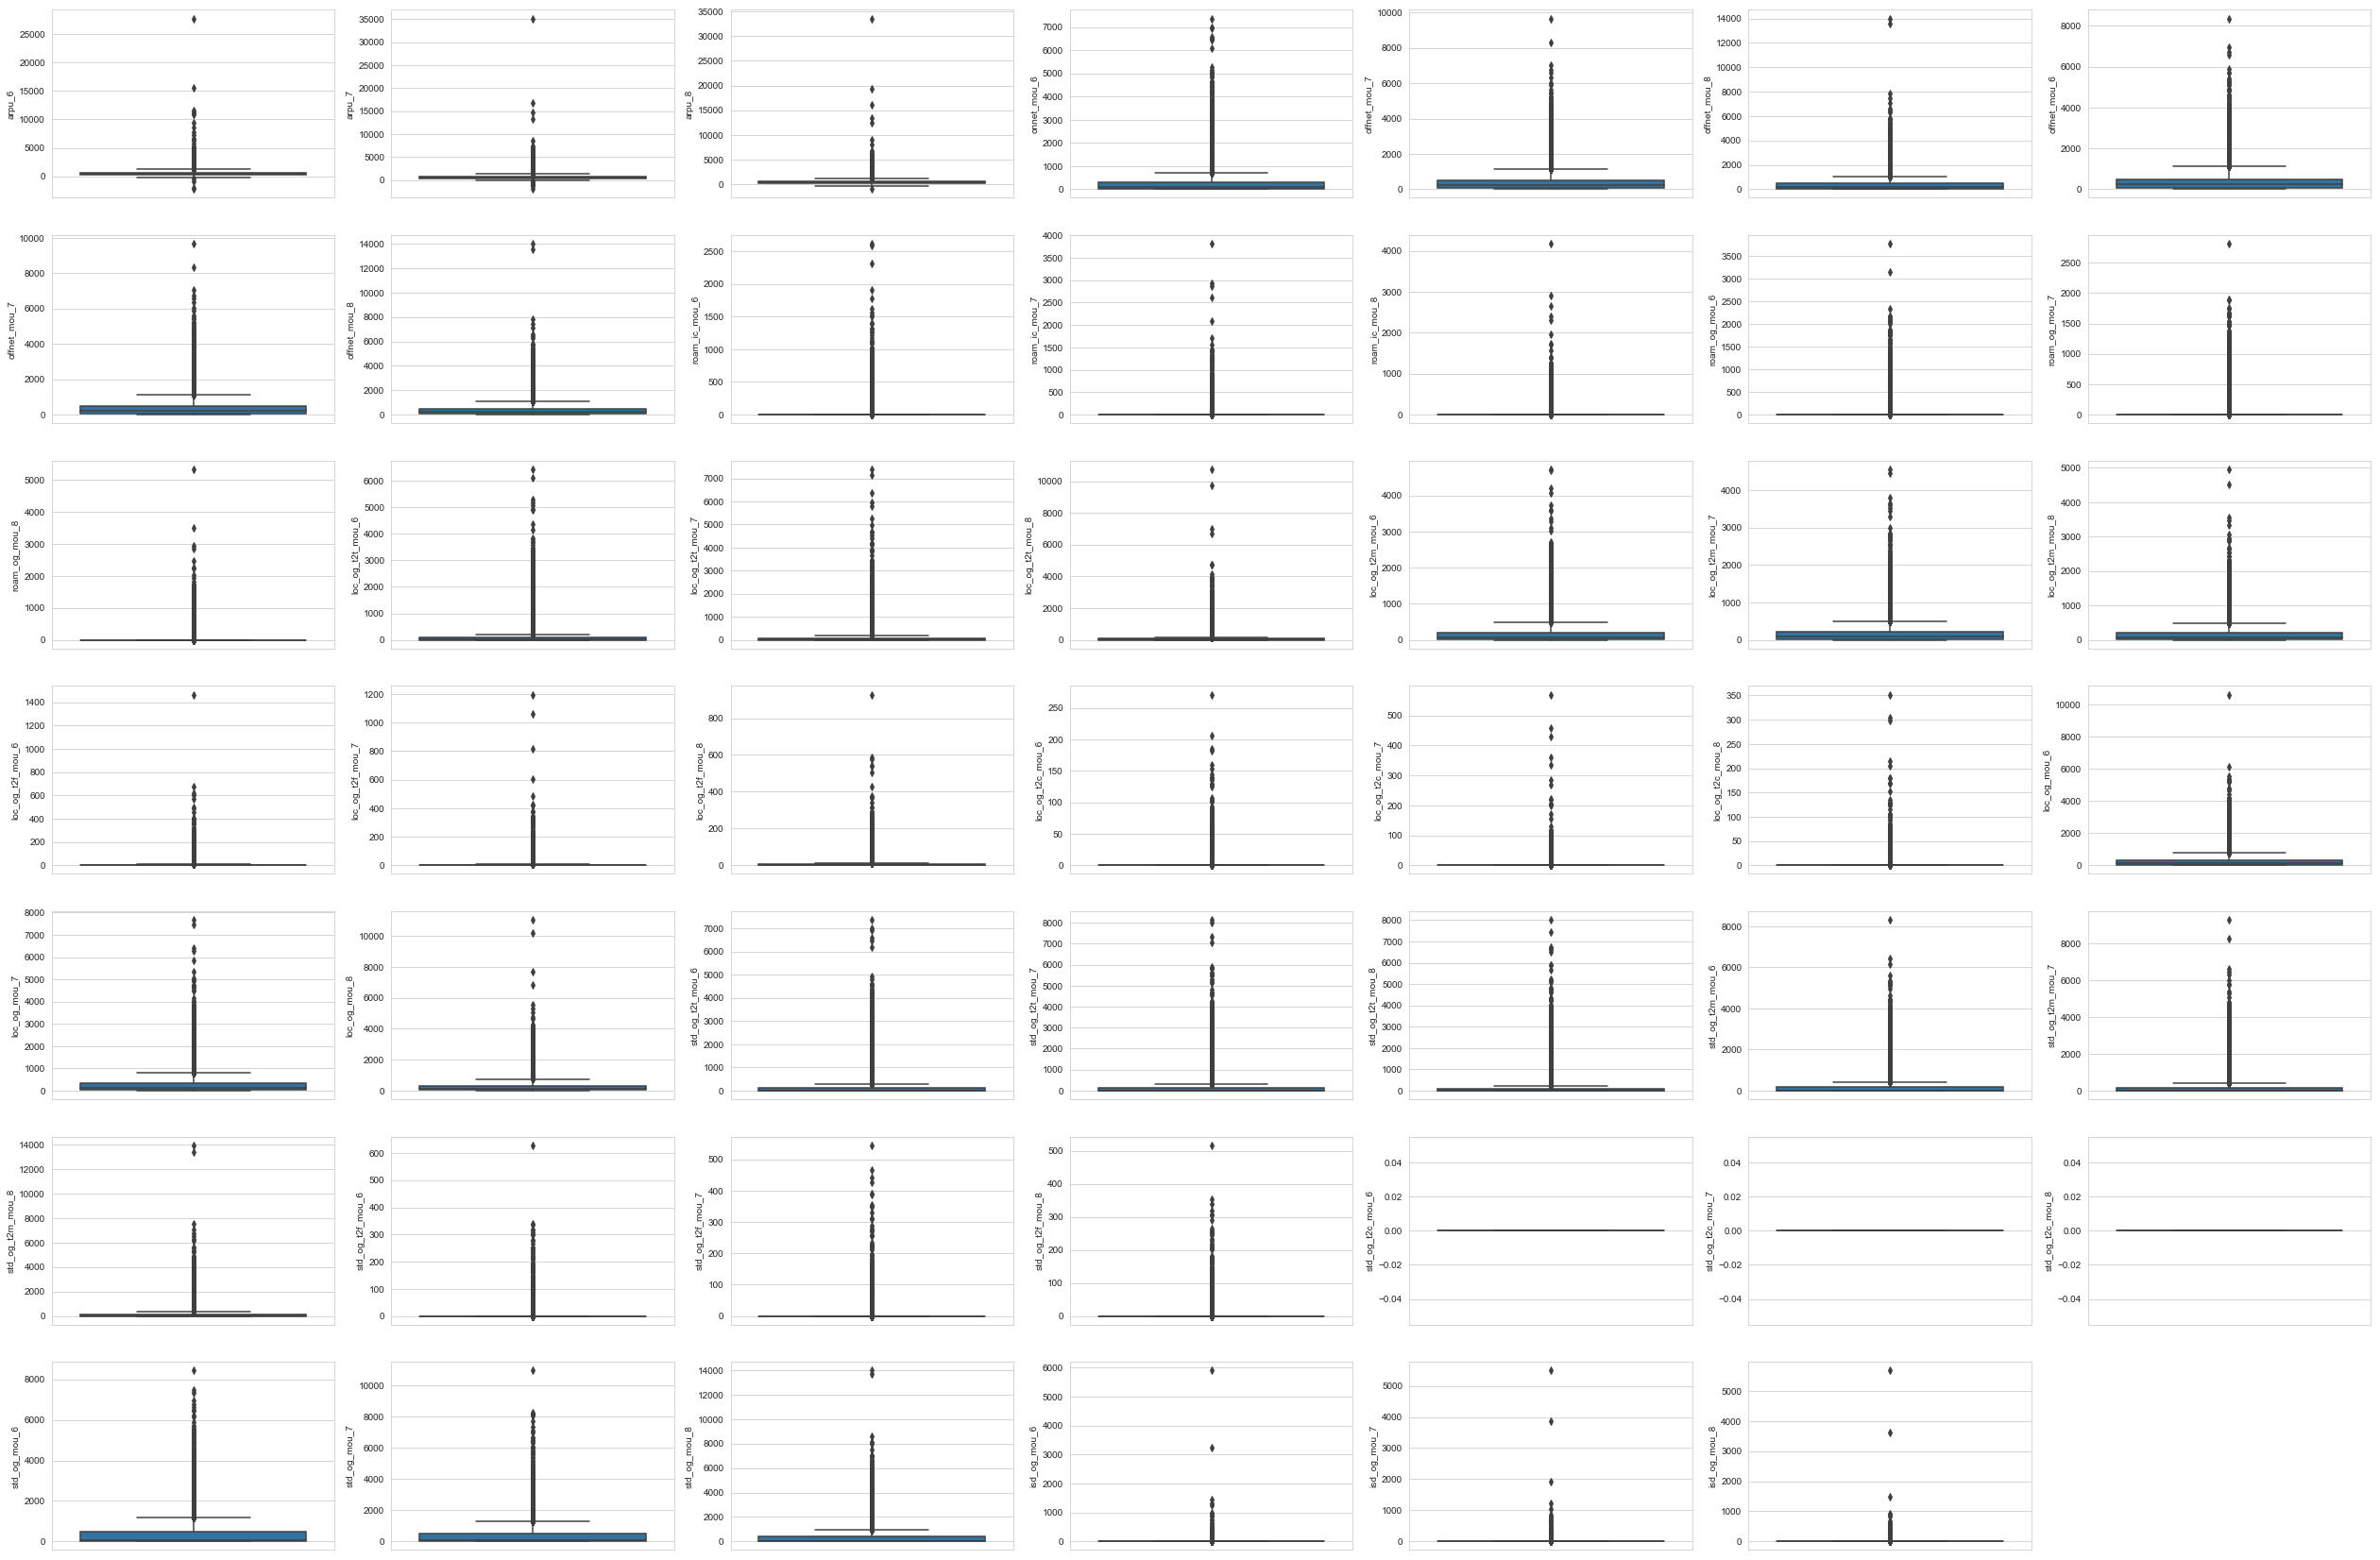

In [36]:
plt.figure(figsize=(44,30))
plt.subplot(7,7,1)
sns.boxplot(y="arpu_6",data=telecom)
plt.subplot(7,7,2)
sns.boxplot(y="arpu_7",data=telecom)
plt.subplot(7,7,3)
sns.boxplot(y="arpu_8",data=telecom)
plt.subplot(7,7,4)
sns.boxplot(y="onnet_mou_6",data=telecom)
plt.subplot(7,7,5)
sns.boxplot(y="offnet_mou_7",data=telecom)
plt.subplot(7,7,6)
sns.boxplot(y="offnet_mou_8",data=telecom)
plt.subplot(7,7,7)
sns.boxplot(y="offnet_mou_6",data=telecom)
plt.subplot(7,7,8)
sns.boxplot(y="offnet_mou_7",data=telecom)
plt.subplot(7,7,9)
sns.boxplot(y="offnet_mou_8",data=telecom)
plt.subplot(7,7,10)
sns.boxplot(y="roam_ic_mou_6",data=telecom)
plt.subplot(7,7,11)
sns.boxplot(y="roam_ic_mou_7",data=telecom)
plt.subplot(7,7,12)
sns.boxplot(y="roam_ic_mou_8",data=telecom)
plt.subplot(7,7,13)
sns.boxplot(y="roam_og_mou_6",data=telecom)
plt.subplot(7,7,14)
sns.boxplot(y="roam_og_mou_7",data=telecom)
plt.subplot(7,7,15)
sns.boxplot(y="roam_og_mou_8",data=telecom)
plt.subplot(7,7,16)
sns.boxplot(y="loc_og_t2t_mou_6",data=telecom)
plt.subplot(7,7,17)
sns.boxplot(y="loc_og_t2t_mou_7",data=telecom)
plt.subplot(7,7,18)
sns.boxplot(y="loc_og_t2t_mou_8",data=telecom)
plt.subplot(7,7,19)
sns.boxplot(y="loc_og_t2m_mou_6",data=telecom)
plt.subplot(7,7,20)
sns.boxplot(y="loc_og_t2m_mou_7",data=telecom)
plt.subplot(7,7,21)
sns.boxplot(y="loc_og_t2m_mou_8",data=telecom)
plt.subplot(7,7,22)
sns.boxplot(y="loc_og_t2f_mou_6",data=telecom)
plt.subplot(7,7,23)
sns.boxplot(y="loc_og_t2f_mou_7",data=telecom)
plt.subplot(7,7,24)
sns.boxplot(y="loc_og_t2f_mou_8",data=telecom)
plt.subplot(7,7,25)
sns.boxplot(y="loc_og_t2c_mou_6",data=telecom)
plt.subplot(7,7,26)
sns.boxplot(y="loc_og_t2c_mou_7",data=telecom)
plt.subplot(7,7,27)
sns.boxplot(y="loc_og_t2c_mou_8",data=telecom)
plt.subplot(7,7,28)
sns.boxplot(y="loc_og_mou_6",data=telecom)
plt.subplot(7,7,29)
sns.boxplot(y="loc_og_mou_7",data=telecom)
plt.subplot(7,7,30)
sns.boxplot(y="loc_og_mou_8",data=telecom)
plt.subplot(7,7,31)
sns.boxplot(y="std_og_t2t_mou_6",data=telecom)
plt.subplot(7,7,32)
sns.boxplot(y="std_og_t2t_mou_7",data=telecom)
plt.subplot(7,7,33)
sns.boxplot(y="std_og_t2t_mou_8",data=telecom)
plt.subplot(7,7,34)
sns.boxplot(y="std_og_t2m_mou_6",data=telecom)
plt.subplot(7,7,35)
sns.boxplot(y="std_og_t2m_mou_7",data=telecom)
plt.subplot(7,7,36)
sns.boxplot(y="std_og_t2m_mou_8",data=telecom)
plt.subplot(7,7,37)
sns.boxplot(y="std_og_t2f_mou_6",data=telecom)
plt.subplot(7,7,38)
sns.boxplot(y="std_og_t2f_mou_7",data=telecom)
plt.subplot(7,7,39)
sns.boxplot(y="std_og_t2f_mou_8",data=telecom)
plt.subplot(7,7,40)
sns.boxplot(y="std_og_t2c_mou_6",data=telecom)
plt.subplot(7,7,41)
sns.boxplot(y="std_og_t2c_mou_7",data=telecom)
plt.subplot(7,7,42)
sns.boxplot(y="std_og_t2c_mou_8",data=telecom)
plt.subplot(7,7,43)
sns.boxplot(y="std_og_mou_6",data=telecom)
plt.subplot(7,7,44)
sns.boxplot(y="std_og_mou_7",data=telecom)
plt.subplot(7,7,45)
sns.boxplot(y="std_og_mou_8",data=telecom)
plt.subplot(7,7,46)
sns.boxplot(y="isd_og_mou_6",data=telecom)
plt.subplot(7,7,47)
sns.boxplot(y="isd_og_mou_7",data=telecom)
plt.subplot(7,7,48)
sns.boxplot(y="isd_og_mou_8",data=telecom)
plt.show()

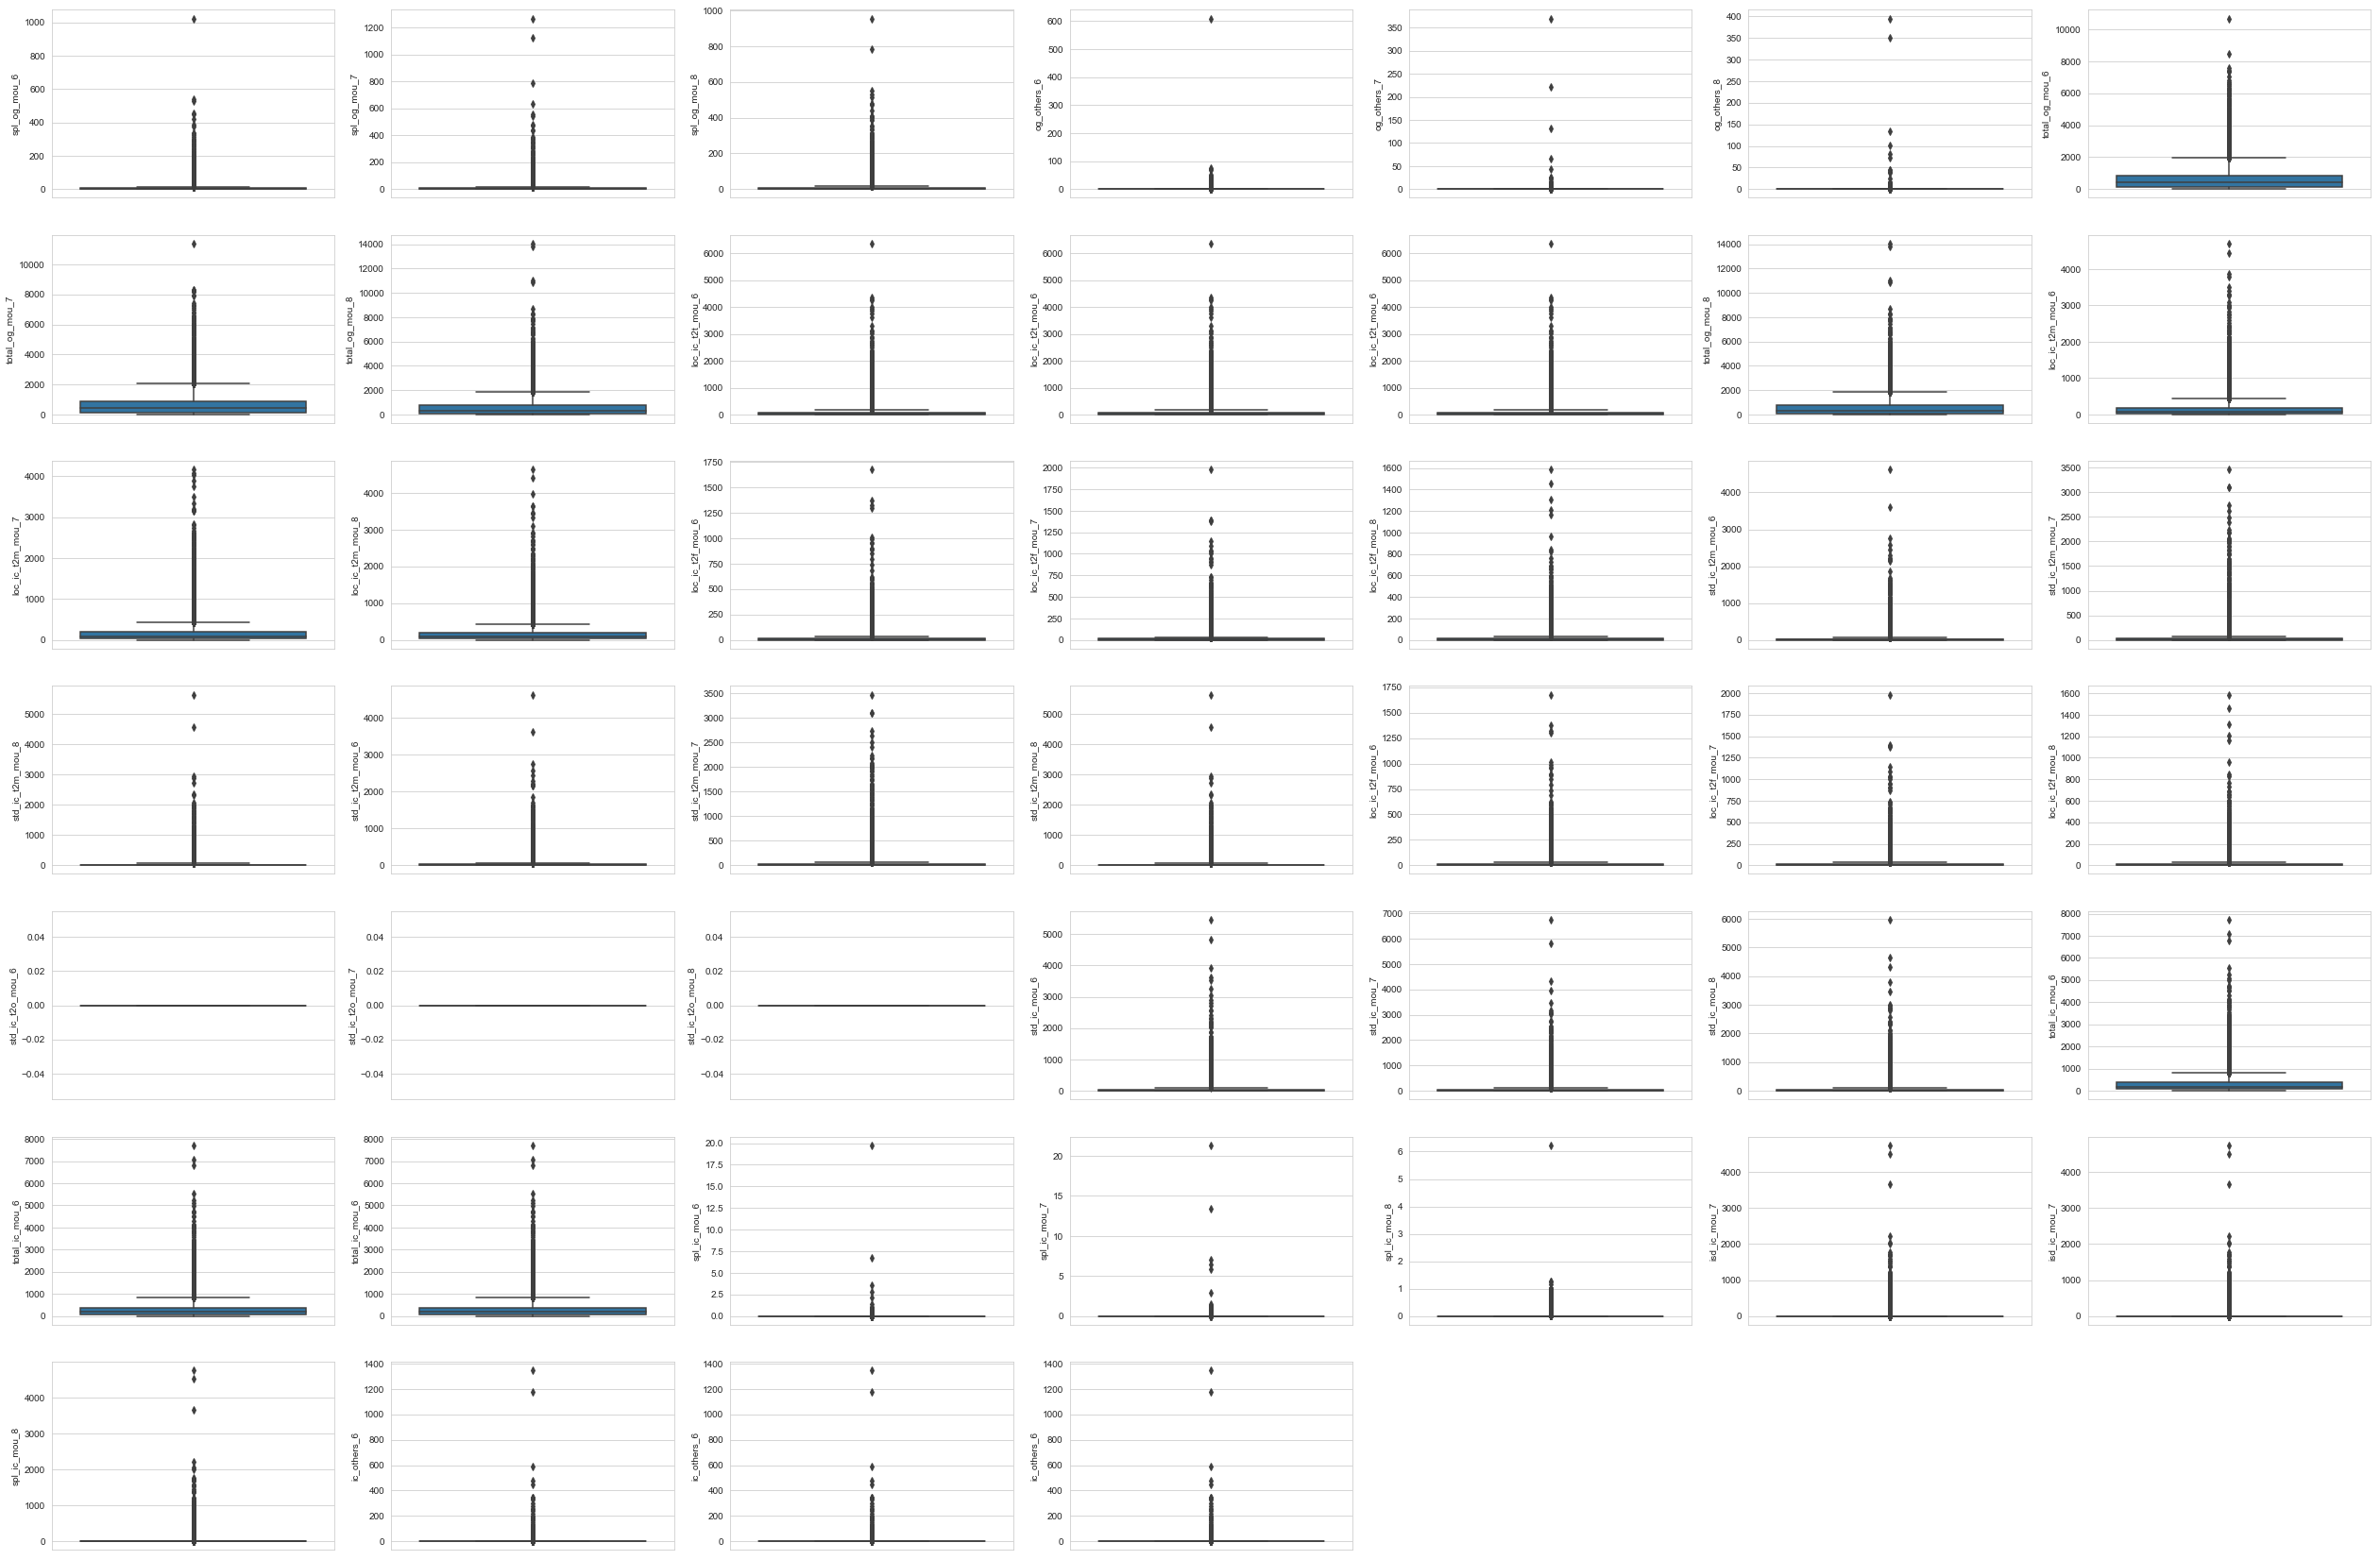

In [37]:
plt.figure(figsize=(44,30))
plt.subplot(7,7,1)
sns.boxplot(y="spl_og_mou_6",data=telecom)
plt.subplot(7,7,2)
sns.boxplot(y="spl_og_mou_7",data=telecom)
plt.subplot(7,7,3)
sns.boxplot(y="spl_og_mou_8",data=telecom)
plt.subplot(7,7,4)
sns.boxplot(y="og_others_6",data=telecom)
plt.subplot(7,7,5)
sns.boxplot(y="og_others_7",data=telecom)
plt.subplot(7,7,6)
sns.boxplot(y="og_others_8",data=telecom)
plt.subplot(7,7,7)
sns.boxplot(y="total_og_mou_6",data=telecom)
plt.subplot(7,7,8)
sns.boxplot(y="total_og_mou_7",data=telecom)
plt.subplot(7,7,9)
sns.boxplot(y="total_og_mou_8",data=telecom)
plt.subplot(7,7,10)
sns.boxplot(y="loc_ic_t2t_mou_6",data=telecom)
plt.subplot(7,7,11)
sns.boxplot(y="loc_ic_t2t_mou_6",data=telecom)
plt.subplot(7,7,12)
sns.boxplot(y="loc_ic_t2t_mou_6",data=telecom)
plt.subplot(7,7,13)
sns.boxplot(y="total_og_mou_8",data=telecom)
plt.subplot(7,7,14)
sns.boxplot(y="loc_ic_t2m_mou_6",data=telecom)
plt.subplot(7,7,15)
sns.boxplot(y="loc_ic_t2m_mou_7",data=telecom)
plt.subplot(7,7,16)
sns.boxplot(y="loc_ic_t2m_mou_8",data=telecom)
plt.subplot(7,7,17)
sns.boxplot(y="loc_ic_t2f_mou_6",data=telecom)
plt.subplot(7,7,18)
sns.boxplot(y="loc_ic_t2f_mou_7",data=telecom)
plt.subplot(7,7,19)
sns.boxplot(y="loc_ic_t2f_mou_8",data=telecom)
plt.subplot(7,7,20)
sns.boxplot(y="std_ic_t2m_mou_6",data=telecom)
plt.subplot(7,7,21)
sns.boxplot(y="std_ic_t2m_mou_7",data=telecom)
plt.subplot(7,7,22)
sns.boxplot(y="std_ic_t2m_mou_8",data=telecom)
plt.subplot(7,7,23)
sns.boxplot(y="std_ic_t2m_mou_6",data=telecom)
plt.subplot(7,7,24)
sns.boxplot(y="std_ic_t2m_mou_7",data=telecom)
plt.subplot(7,7,25)
sns.boxplot(y="std_ic_t2m_mou_8",data=telecom)
plt.subplot(7,7,26)
sns.boxplot(y="loc_ic_t2f_mou_6",data=telecom)
plt.subplot(7,7,27)
sns.boxplot(y="loc_ic_t2f_mou_7",data=telecom)
plt.subplot(7,7,28)
sns.boxplot(y="loc_ic_t2f_mou_8",data=telecom)
plt.subplot(7,7,29)
sns.boxplot(y="std_ic_t2o_mou_6",data=telecom)
plt.subplot(7,7,30)
sns.boxplot(y="std_ic_t2o_mou_7",data=telecom)
plt.subplot(7,7,31)
sns.boxplot(y="std_ic_t2o_mou_8",data=telecom)
plt.subplot(7,7,32)
sns.boxplot(y="std_ic_mou_6",data=telecom)
plt.subplot(7,7,33)
sns.boxplot(y="std_ic_mou_7",data=telecom)
plt.subplot(7,7,34)
sns.boxplot(y="std_ic_mou_8",data=telecom)
plt.subplot(7,7,35)
sns.boxplot(y="total_ic_mou_6",data=telecom)
plt.subplot(7,7,36)
sns.boxplot(y="total_ic_mou_6",data=telecom)
plt.subplot(7,7,37)
sns.boxplot(y="total_ic_mou_6",data=telecom)
plt.subplot(7,7,38)
sns.boxplot(y="spl_ic_mou_6",data=telecom)
plt.subplot(7,7,39)
sns.boxplot(y="spl_ic_mou_7",data=telecom)
plt.subplot(7,7,40)
sns.boxplot(y="spl_ic_mou_8",data=telecom)
plt.subplot(7,7,41)
sns.boxplot(y="isd_ic_mou_7",data=telecom)
plt.subplot(7,7,42)
sns.boxplot(y="isd_ic_mou_7",data=telecom)
plt.subplot(7,7,43)
sns.boxplot(y="isd_ic_mou_7",data=telecom)
sns.boxplot(y="spl_ic_mou_8",data=telecom)
plt.subplot(7,7,44)
sns.boxplot(y="ic_others_6",data=telecom)
plt.subplot(7,7,45)
sns.boxplot(y="ic_others_6",data=telecom)
plt.subplot(7,7,46)
sns.boxplot(y="ic_others_6",data=telecom)
plt.show()

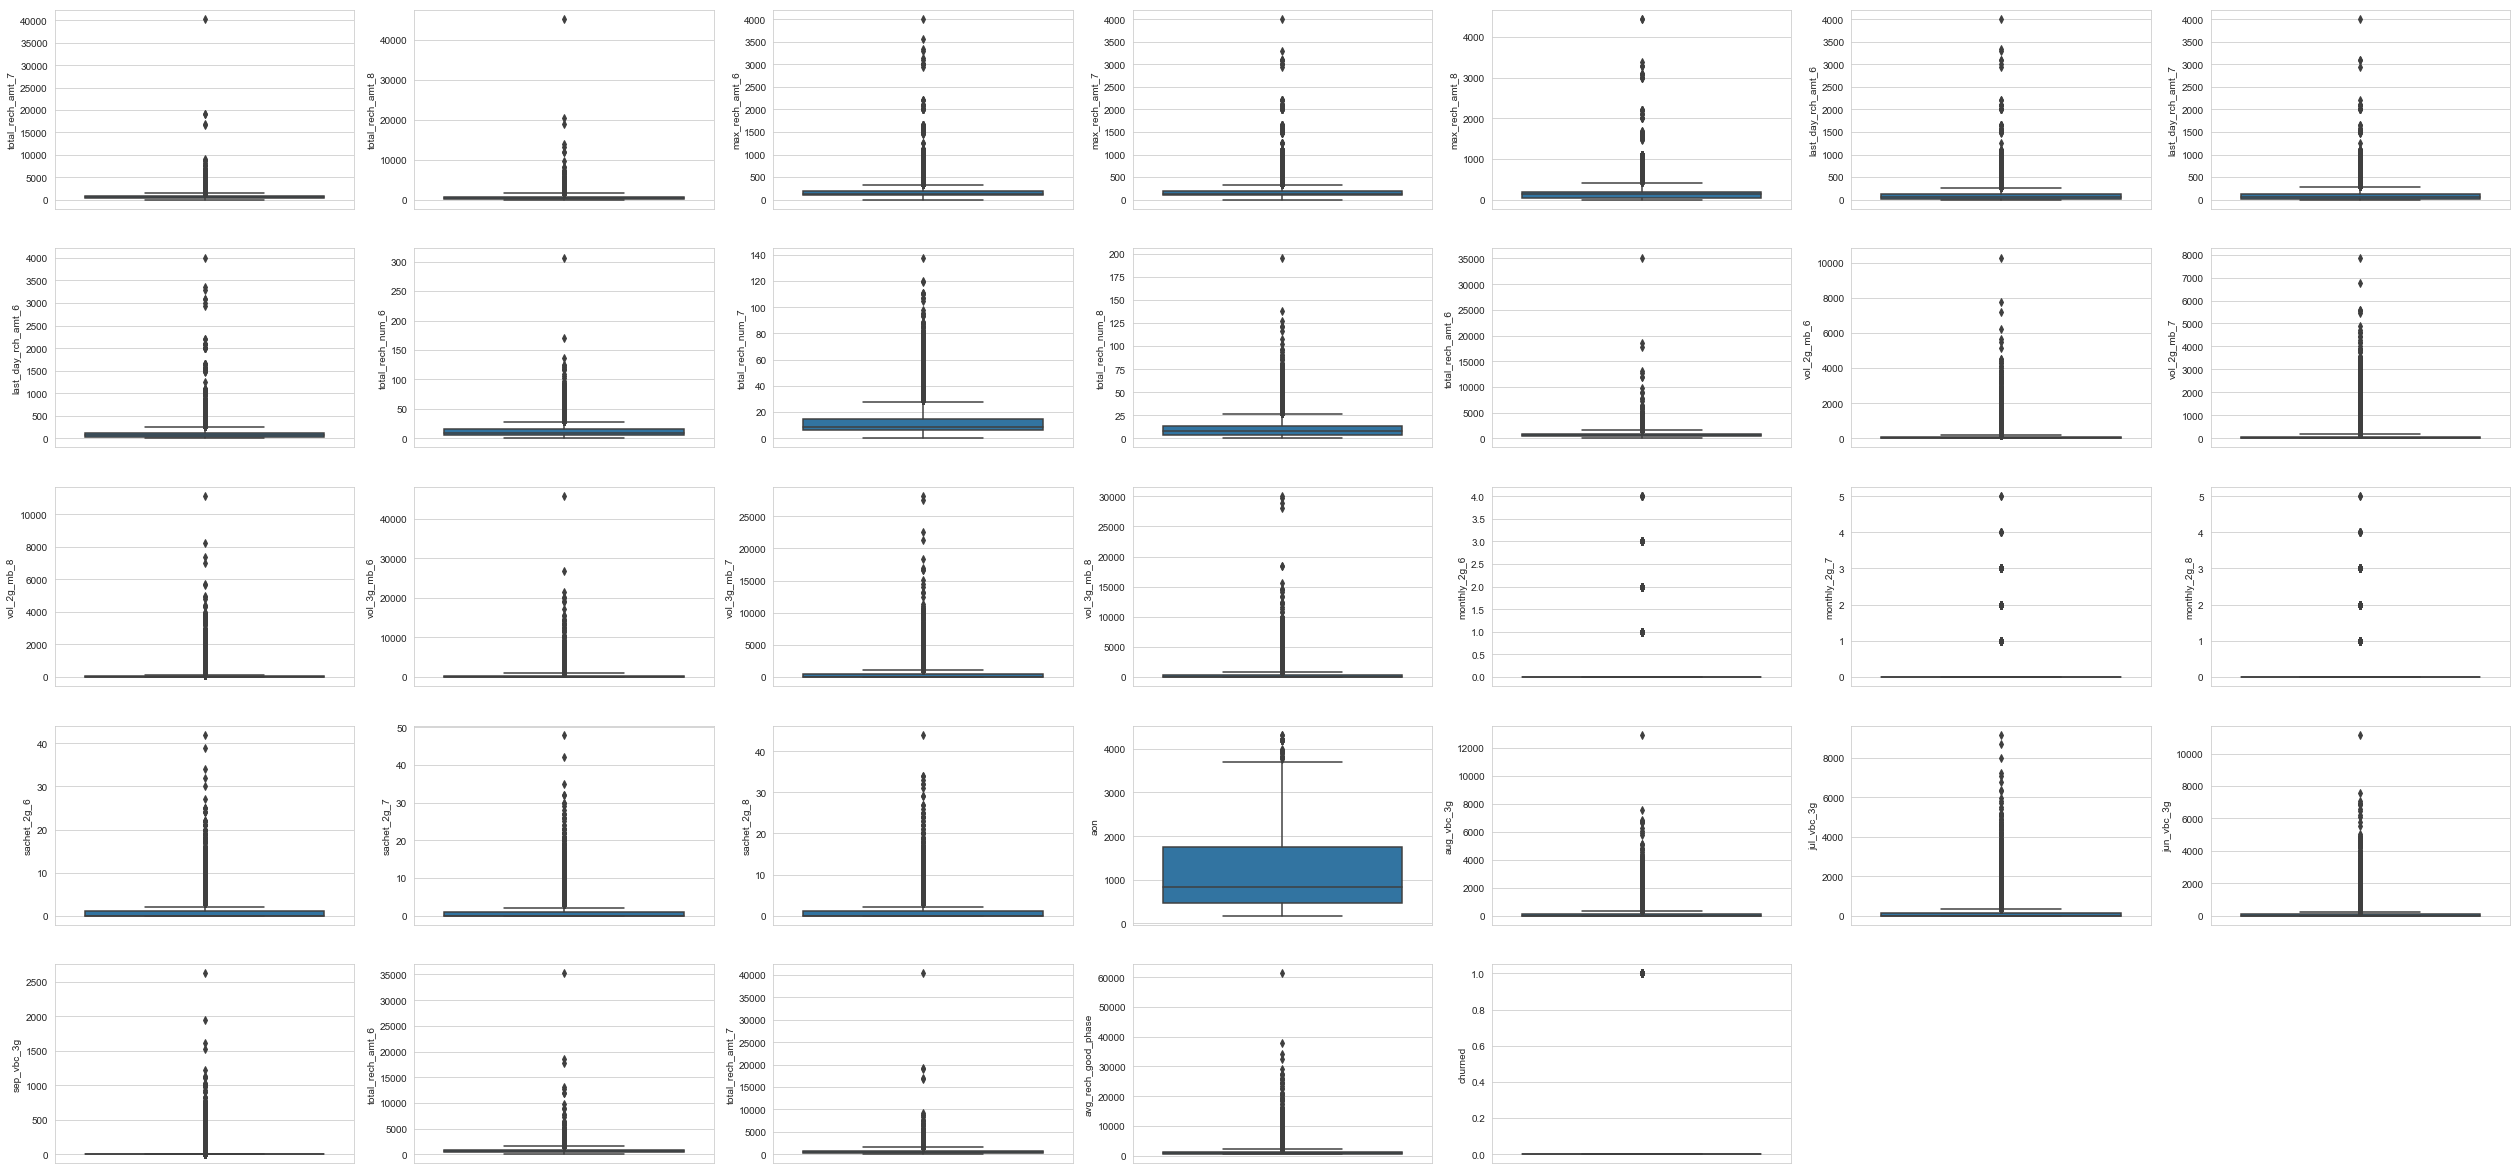

In [38]:
plt.figure(figsize=(44,30))
plt.subplot(7,7,1)
sns.boxplot(y="total_rech_amt_7",data=telecom)
plt.subplot(7,7,2)
sns.boxplot(y="total_rech_amt_8",data=telecom)
plt.subplot(7,7,3)
sns.boxplot(y="max_rech_amt_6",data=telecom)
plt.subplot(7,7,4)
sns.boxplot(y="max_rech_amt_7",data=telecom)
plt.subplot(7,7,5)
sns.boxplot(y="max_rech_amt_8",data=telecom)
plt.subplot(7,7,6)
sns.boxplot(y="last_day_rch_amt_6",data=telecom)
plt.subplot(7,7,7)
sns.boxplot(y="last_day_rch_amt_7",data=telecom)
plt.subplot(7,7,8)
sns.boxplot(y="last_day_rch_amt_6",data=telecom)
plt.subplot(7,7,9)
sns.boxplot(y="total_rech_num_6",data=telecom)
plt.subplot(7,7,10)
sns.boxplot(y="total_rech_num_7",data=telecom)
plt.subplot(7,7,11)
sns.boxplot(y="total_rech_num_8",data=telecom)
plt.subplot(7,7,12)
sns.boxplot(y="total_rech_amt_6",data=telecom)
plt.subplot(7,7,13)
sns.boxplot(y="vol_2g_mb_6",data=telecom)
plt.subplot(7,7,14)
sns.boxplot(y="vol_2g_mb_7",data=telecom)
plt.subplot(7,7,15)
sns.boxplot(y="vol_2g_mb_8",data=telecom)
plt.subplot(7,7,16)
sns.boxplot(y="vol_3g_mb_6",data=telecom)
plt.subplot(7,7,17)
sns.boxplot(y="vol_3g_mb_7",data=telecom)
plt.subplot(7,7,18)
sns.boxplot(y="vol_3g_mb_8",data=telecom)
plt.subplot(7,7,19)
sns.boxplot(y="monthly_2g_6",data=telecom)
plt.subplot(7,7,20)
sns.boxplot(y="monthly_2g_7",data=telecom)
plt.subplot(7,7,21)
sns.boxplot(y="monthly_2g_8",data=telecom)
plt.subplot(7,7,22)
sns.boxplot(y="sachet_2g_6",data=telecom)
plt.subplot(7,7,23)
sns.boxplot(y="sachet_2g_7",data=telecom)
plt.subplot(7,7,24)
sns.boxplot(y="sachet_2g_8",data=telecom)
plt.subplot(7,7,25)
sns.boxplot(y="aon",data=telecom)
plt.subplot(7,7,26)
sns.boxplot(y="aug_vbc_3g",data=telecom)
plt.subplot(7,7,27)
sns.boxplot(y="jul_vbc_3g",data=telecom)
plt.subplot(7,7,28)
sns.boxplot(y="jun_vbc_3g",data=telecom)
plt.subplot(7,7,29)
sns.boxplot(y="sep_vbc_3g",data=telecom)
plt.subplot(7,7,30)
sns.boxplot(y="total_rech_amt_6",data=telecom)
plt.subplot(7,7,31)
sns.boxplot(y="total_rech_amt_7",data=telecom)
plt.subplot(7,7,32)
sns.boxplot(y="avg_rech_good_phase",data=telecom)
plt.subplot(7,7,33)
sns.boxplot(y="churned",data=telecom)
plt.show()

### Data Cleaning

In [39]:
#Dropping the columns which have more than or equal to 30% of null values
thresh = len(telecom) * .7
telecom.dropna(thresh = thresh, axis = 1, inplace = True)

In [40]:
#Checking the shape of the data set
telecom.shape

(30001, 152)

In [41]:
# Checking the column-wise null percentages here
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

std_og_mou_8           3.91
roam_ic_mou_8          3.91
std_og_t2m_mou_8       3.91
std_ic_t2t_mou_8       3.91
loc_og_t2t_mou_8       3.91
std_ic_t2m_mou_8       3.91
loc_og_t2m_mou_8       3.91
std_ic_t2f_mou_8       3.91
loc_og_t2f_mou_8       3.91
std_ic_t2o_mou_8       3.91
loc_og_t2c_mou_8       3.91
std_ic_mou_8           3.91
std_og_t2f_mou_8       3.91
loc_og_mou_8           3.91
spl_ic_mou_8           3.91
std_og_t2t_mou_8       3.91
isd_ic_mou_8           3.91
loc_ic_mou_8           3.91
roam_og_mou_8          3.91
std_og_t2c_mou_8       3.91
onnet_mou_8            3.91
isd_og_mou_8           3.91
spl_og_mou_8           3.91
og_others_8            3.91
loc_ic_t2t_mou_8       3.91
loc_ic_t2m_mou_8       3.91
ic_others_8            3.91
loc_ic_t2f_mou_8       3.91
offnet_mou_8           3.91
date_of_last_rech_8    1.94
                       ... 
total_data_rech_7      0.00
total_rech_6           0.00
total_rech_7           0.00
vol_3g_mb_7            0.00
vol_2g_mb_8         

In [42]:
#Checking the value counts of the column
telecom['circle_id'].value_counts()

109    30001
Name: circle_id, dtype: int64

In [43]:
#Dropping the column as more than 90% of the values are same
telecom.drop(['circle_id'],axis=1,inplace=True)

In [44]:
#Checking the value counts of the column
telecom['loc_og_t2o_mou'].value_counts()

0.0    29777
Name: loc_og_t2o_mou, dtype: int64

In [45]:
#Dropping the column as more than 90% of the values are same and remainining are null values
telecom.drop(['loc_og_t2o_mou'],axis=1,inplace=True)

In [46]:
#Checking the value counts of the column
telecom['std_og_t2o_mou'].value_counts()

0.0    29777
Name: std_og_t2o_mou, dtype: int64

In [47]:
#Dropping the column as more than 90% of the values are same and remainining are null values
telecom.drop(['std_og_t2o_mou'],axis=1,inplace=True)

In [48]:
#Checking the value counts of the column
telecom['loc_ic_t2o_mou'].value_counts()

0.0    29777
Name: loc_ic_t2o_mou, dtype: int64

In [49]:
#Dropping the column as more than 90% of the values are same and remainining are null values
telecom.drop(['loc_ic_t2o_mou'],axis=1,inplace=True)

In [50]:
#Checking the value counts of the column
telecom['std_og_t2c_mou_6'].value_counts()

0.0    29456
Name: std_og_t2c_mou_6, dtype: int64

In [51]:
#Dropping the column as more than 90% of the values are same and remainining are null values
telecom.drop(['std_og_t2c_mou_6'],axis=1,inplace=True)

In [52]:
#Checking the value counts of the column
telecom['std_og_t2c_mou_7'].value_counts()

0.0    29464
Name: std_og_t2c_mou_7, dtype: int64

In [53]:
#Dropping the column as more than 90% of the values are same
telecom.drop(['std_og_t2c_mou_7'],axis=1,inplace=True)

In [54]:
#Checking the value counts of the column
telecom['std_og_t2c_mou_8'].value_counts()

0.0    28827
Name: std_og_t2c_mou_8, dtype: int64

In [55]:
#Dropping the column as more than 90% of the values are same
telecom.drop(['std_og_t2c_mou_8'],axis=1,inplace=True)

In [56]:
#Checking the value counts of the column
telecom['std_ic_t2o_mou_6'].value_counts()

0.0    29456
Name: std_ic_t2o_mou_6, dtype: int64

In [57]:
#Dropping the column as more than 90% of the values are same
telecom.drop(['std_ic_t2o_mou_6'],axis=1,inplace=True)

In [58]:
#Checking the value counts of the column
telecom['std_ic_t2o_mou_7'].value_counts()

0.0    29464
Name: std_ic_t2o_mou_7, dtype: int64

In [59]:
#Dropping the column as more than 90% of the values are same
telecom.drop(['std_ic_t2o_mou_7'],axis=1,inplace=True)

In [60]:
#Checking the value counts of the column
telecom['std_ic_t2o_mou_8'].value_counts()

0.0    28827
Name: std_ic_t2o_mou_8, dtype: int64

In [61]:
#Dropping the column as more than 90% of the values are same
telecom.drop(['std_ic_t2o_mou_8'],axis=1,inplace=True)

In [62]:
# Checking the column-wise null percentages here
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

std_ic_t2f_mou_8       3.91
loc_ic_mou_8           3.91
loc_og_t2f_mou_8       3.91
std_og_mou_8           3.91
isd_ic_mou_8           3.91
loc_og_t2m_mou_8       3.91
std_ic_mou_8           3.91
loc_og_mou_8           3.91
loc_og_t2t_mou_8       3.91
std_og_t2m_mou_8       3.91
roam_og_mou_8          3.91
std_ic_t2m_mou_8       3.91
roam_ic_mou_8          3.91
loc_og_t2c_mou_8       3.91
std_ic_t2t_mou_8       3.91
offnet_mou_8           3.91
ic_others_8            3.91
loc_ic_t2f_mou_8       3.91
onnet_mou_8            3.91
loc_ic_t2m_mou_8       3.91
std_og_t2f_mou_8       3.91
loc_ic_t2t_mou_8       3.91
std_og_t2t_mou_8       3.91
isd_og_mou_8           3.91
spl_og_mou_8           3.91
og_others_8            3.91
spl_ic_mou_8           3.91
date_of_last_rech_8    1.94
ic_others_6            1.82
std_og_mou_6           1.82
                       ... 
total_data_rech_7      0.00
total_rech_6           0.00
total_rech_7           0.00
vol_3g_mb_7            0.00
vol_2g_mb_8         

In [63]:
#Storing the columns of the data set in a variable
cols=telecom.columns
cols

Index(['mobile_number', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_data_rech_6', 'total_data_rech_7', 'total_rech_6',
       'total_rech_7', 'avg_rech_good_phase', 'churned'],
      dtype='object', length=142)

In [64]:
#Changing the data type of the columns containing date to datatime 
for i in cols:
    if telecom[i].dtype=='O':        
           telecom[i]=pd.to_datetime(telecom[i])

In [65]:
#Checking the info of the data set
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 142 entries, mobile_number to churned
dtypes: datetime64[ns](6), float64(109), int64(27)
memory usage: 34.0 MB


In [66]:
#Checking the head of the data set
telecom.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,avg_rech_good_phase,churned
0,7000842753,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7000701601,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
8,7001524846,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
21,7002124215,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7000887461,2014-06-30,2014-07-31,2014-08-31,74.350,193.897,366.966,48.96,50.66,33.58,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0


In [67]:
# Checking the column-wise null percentages here
round(100*(telecom[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

date_of_last_rech_8    1.94
date_of_last_rech_7    0.33
date_of_last_rech_6    0.24
dtype: float64

In [68]:
#Dropping the rows with null values
telecom=telecom.dropna(subset=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'])

In [69]:
# Checking the column-wise null percentages here
round(100*(telecom[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',]].isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

date_of_last_rech_8    0.0
date_of_last_rech_7    0.0
date_of_last_rech_6    0.0
dtype: float64

In [70]:
# Checking the column-wise null percentages here
round(100*(telecom[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']].isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

last_date_of_month_8    0.0
last_date_of_month_7    0.0
last_date_of_month_6    0.0
dtype: float64

In [71]:
#Importing datetime
from datetime import datetime

In [72]:
#Creating new columns to store the number of days left in a month after the last recharge
telecom['days_after_last_rech_6']=(telecom['last_date_of_month_6']-telecom['date_of_last_rech_6']).dt.days
telecom['days_after_last_rech_7']=(telecom['last_date_of_month_7']-telecom['date_of_last_rech_7']).dt.days
telecom['days_after_last_rech_8']=(telecom['last_date_of_month_8']-telecom['date_of_last_rech_8']).dt.days

In [73]:
#Dropping the columns as we have created new columns from them and we dont need them anymore
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [74]:
# Checking the column-wise null percentages here
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

std_ic_t2t_mou_8          2.92
isd_ic_mou_8              2.92
loc_og_t2c_mou_8          2.92
loc_og_mou_8              2.92
std_og_t2t_mou_8          2.92
std_og_t2m_mou_8          2.92
std_og_t2f_mou_8          2.92
std_og_mou_8              2.92
isd_og_mou_8              2.92
ic_others_8               2.92
spl_ic_mou_8              2.92
loc_og_t2m_mou_8          2.92
spl_og_mou_8              2.92
std_ic_mou_8              2.92
std_ic_t2f_mou_8          2.92
std_ic_t2m_mou_8          2.92
loc_ic_mou_8              2.92
loc_ic_t2f_mou_8          2.92
loc_ic_t2m_mou_8          2.92
loc_ic_t2t_mou_8          2.92
loc_og_t2f_mou_8          2.92
og_others_8               2.92
onnet_mou_8               2.92
roam_og_mou_8             2.92
loc_og_t2t_mou_8          2.92
offnet_mou_8              2.92
roam_ic_mou_8             2.92
ic_others_6               1.64
roam_og_mou_6             1.64
isd_og_mou_6              1.64
                          ... 
churned                   0.00
days_aft

In [75]:
#Checking the info of the data set
telecom.info(verbose = True, null_counts = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29309 entries, 0 to 99997
Data columns (total 139 columns):
mobile_number             29309 non-null int64
arpu_6                    29309 non-null float64
arpu_7                    29309 non-null float64
arpu_8                    29309 non-null float64
onnet_mou_6               28829 non-null float64
onnet_mou_7               28875 non-null float64
onnet_mou_8               28452 non-null float64
offnet_mou_6              28829 non-null float64
offnet_mou_7              28875 non-null float64
offnet_mou_8              28452 non-null float64
roam_ic_mou_6             28829 non-null float64
roam_ic_mou_7             28875 non-null float64
roam_ic_mou_8             28452 non-null float64
roam_og_mou_6             28829 non-null float64
roam_og_mou_7             28875 non-null float64
roam_og_mou_8             28452 non-null float64
loc_og_t2t_mou_6          28829 non-null float64
loc_og_t2t_mou_7          28875 non-null float64
loc_og_t2t

In [76]:
#Storing all the columns with null values in a variable
list1=[ i for i in telecom.columns if round(100*(telecom[i].isnull().sum()/len(telecom.index)),2)>0]

In [77]:
#Importing Iterative Imputer
from fancyimpute import IterativeImputer as MICE

Using TensorFlow backend.


In [78]:
#Imputing the missing values using the imputer
telecom[list1] = MICE().fit_transform(telecom[list1])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [79]:
#Imputing the missing values with zero
#telecom.fillna(0, inplace = True)

In [80]:
# Checking the column-wise null percentages here
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

days_after_last_rech_8    0.0
isd_og_mou_6              0.0
og_others_6               0.0
spl_og_mou_8              0.0
spl_og_mou_7              0.0
spl_og_mou_6              0.0
isd_og_mou_8              0.0
isd_og_mou_7              0.0
std_og_mou_8              0.0
std_og_t2m_mou_6          0.0
std_og_mou_7              0.0
std_og_mou_6              0.0
std_og_t2f_mou_8          0.0
std_og_t2f_mou_7          0.0
std_og_t2f_mou_6          0.0
std_og_t2m_mou_8          0.0
og_others_7               0.0
og_others_8               0.0
total_og_mou_6            0.0
total_og_mou_7            0.0
total_og_mou_8            0.0
loc_ic_t2t_mou_6          0.0
loc_ic_t2t_mou_7          0.0
loc_ic_t2t_mou_8          0.0
loc_ic_t2m_mou_6          0.0
loc_ic_t2m_mou_7          0.0
loc_ic_t2m_mou_8          0.0
loc_ic_t2f_mou_6          0.0
loc_ic_t2f_mou_7          0.0
loc_ic_t2f_mou_8          0.0
                         ... 
spl_ic_mou_6              0.0
total_ic_mou_8            0.0
total_ic_m

In [81]:
#Checking the info of the data set
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29309 entries, 0 to 99997
Columns: 139 entries, mobile_number to days_after_last_rech_8
dtypes: float64(109), int64(30)
memory usage: 31.3 MB


### Outlier Treatment

In [82]:
#Checking for outliers in the data
telecom.describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sep_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,avg_rech_good_phase,churned,days_after_last_rech_6,days_after_last_rech_7,days_after_last_rech_8
count,2.930900e+04,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,...,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000
mean,7.001207e+09,557.336657,565.213995,516.702002,266.031723,274.589407,245.193576,379.064109,385.682902,349.453263,...,8.179757,456.640026,535.536394,1114.859651,1200.574267,1157.716959,0.071207,3.477840,3.625405,4.303797
std,6.904730e+05,451.521621,479.692319,501.839797,457.412858,480.642613,459.693031,476.598305,495.328560,476.520839,...,52.857256,1428.323535,1489.914441,1573.151794,1644.550483,1369.770105,0.257174,4.600139,4.442651,5.257895
min,7.000000e+09,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000,0.000000,0.000000,0.000000,0.000000
5%,7.000128e+09,114.693400,123.882800,27.947200,0.000000,0.000000,0.000000,3.280000,2.834000,1.004000,...,0.000000,0.000000,0.000000,250.000000,270.000000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000609e+09,311.327000,314.978000,241.340000,20.210000,19.260000,15.790000,80.830000,79.160000,63.580000,...,0.000000,0.000000,0.000000,546.000000,558.000000,604.000000,0.000000,0.000000,0.000000,1.000000
50%,7.001204e+09,481.940000,484.115000,434.472000,92.790000,91.660000,79.890000,236.330000,233.740000,211.310000,...,0.000000,98.000000,145.000000,785.000000,819.000000,802.000000,0.000000,2.000000,2.000000,3.000000
75%,7.001804e+09,697.944000,701.116000,666.371000,292.710000,295.280000,248.781889,487.460000,496.230000,444.840000,...,0.000000,400.000000,575.000000,1204.000000,1276.000000,1211.500000,0.000000,4.000000,5.000000,6.000000
90%,7.002165e+09,987.310200,998.146200,984.805800,756.524000,790.000000,676.004000,891.906000,917.428000,828.350000,...,1.262000,1116.000000,1377.000000,2006.000000,2199.000000,2001.600000,0.000000,10.000000,10.000000,11.000000
95%,7.002285e+09,1234.911400,1263.249200,1262.579800,1132.464000,1193.042000,1085.468000,1250.930000,1272.190000,1172.432000,...,32.602000,2065.000000,2432.000000,2896.000000,3175.000000,2819.000000,1.000000,14.000000,14.000000,16.000000


In [83]:
# Removing the outliers
Q1 = telecom['avg_rech_good_phase'].quantile(0.05)
Q3 = telecom['avg_rech_good_phase'].quantile(0.75)
IQR=Q3-Q1
telecom = telecom.loc[(telecom['avg_rech_good_phase']>=(Q1-(1.5*IQR)))&(telecom['avg_rech_good_phase'] <=(Q3+(1.5*IQR)))]

In [84]:
#Checking the summary statistics of the data set 
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sep_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,avg_rech_good_phase,churned,days_after_last_rech_6,days_after_last_rech_7,days_after_last_rech_8
count,2.708000e+04,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,...,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000
mean,7.001209e+09,526.347604,532.013649,489.438009,268.582079,277.521477,246.243270,377.159369,384.459539,348.398512,...,6.886347,254.456315,297.104395,876.031758,922.737667,899.384713,0.072120,3.565436,3.718390,4.392799
std,6.891597e+05,321.096587,323.182976,363.712505,441.120022,464.096165,436.649165,448.237108,466.323172,453.230412,...,47.815990,448.418634,504.456261,541.259821,585.661594,405.211682,0.258691,4.660679,4.500881,5.328268
min,7.000000e+09,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000615e+09,311.359250,314.716750,240.547250,22.260000,21.330000,17.230000,85.637500,84.352500,67.427500,...,0.000000,0.000000,0.000000,532.000000,546.000000,593.000000,0.000000,0.000000,0.000000,1.000000
50%,7.001209e+09,476.049500,478.141000,430.173500,98.080000,96.730000,83.480000,241.850000,240.020000,216.280000,...,0.000000,25.000000,91.000000,750.000000,774.000000,764.000000,0.000000,2.000000,2.000000,3.000000
75%,7.001804e+09,676.220500,678.314250,649.690250,303.022500,305.457500,255.310000,490.470000,499.850000,446.615000,...,0.000000,252.000000,378.000000,1081.000000,1137.000000,1082.000000,0.000000,5.000000,5.000000,6.000000
90%,7.002165e+09,929.335900,934.249000,925.627800,767.892000,802.747000,684.860000,885.501000,912.740000,821.945000,...,0.100000,792.000000,900.000000,1559.100000,1680.000000,1511.050000,0.000000,10.000000,10.000000,11.000000
95%,7.002285e+09,1125.908050,1143.386800,1167.387650,1138.149500,1200.533000,1090.447000,1227.550500,1256.723500,1163.747500,...,24.260500,1170.100000,1374.000000,1950.000000,2106.000000,1803.000000,1.000000,15.000000,14.000000,16.000000
99%,7.002385e+09,1582.838260,1606.381930,1712.973820,2097.592200,2171.881900,2130.049600,2195.244300,2293.204200,2114.716300,...,172.981900,2268.000000,2432.000000,2820.000000,3006.520000,2161.500000,1.000000,19.000000,19.000000,26.000000


### Test - Train Split

In [85]:
#Importing the required libraries
from sklearn.model_selection import train_test_split

In [86]:
#Dividing the data set into x and y sets for the model building.
y = telecom['churned']
X = telecom.drop(['churned','mobile_number'], 1)

In [87]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling

In [88]:
#Importing the required libraries
from sklearn.preprocessing import StandardScaler

In [89]:
#creating the standard scaler
scaler = StandardScaler()

In [90]:
# Applying standard scaler to all the numeric columns of train data set
num_vars = X_train.columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [91]:
# Applying standard scaler to all the numeric columns of test data set
X_test[num_vars] = scaler.transform(X_test[num_vars])

### PCA

In [92]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [93]:
#Performing PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [94]:
#Checking the principal components
pca.components_

array([[ 1.70269994e-01,  1.87645630e-01,  1.67422356e-01, ...,
        -6.76157711e-02, -6.21143002e-02, -5.57996071e-02],
       [ 7.04823351e-03, -7.71223714e-03,  1.84384508e-02, ...,
         5.59679080e-02,  4.92686815e-02,  4.49736357e-02],
       [-8.05176386e-02, -1.26569742e-01, -1.40332955e-01, ...,
        -8.61150358e-02, -5.44081482e-02, -3.49796485e-02],
       ...,
       [ 0.00000000e+00, -6.08351382e-17,  2.16121248e-16, ...,
         1.34103389e-16, -6.17584100e-17, -6.17751165e-17],
       [ 0.00000000e+00, -2.96991354e-18,  2.70872349e-16, ...,
        -3.92085364e-18, -3.14035326e-17, -1.94667161e-17],
       [ 0.00000000e+00,  1.79003572e-16, -7.10836714e-17, ...,
        -5.24453633e-18, -5.21715016e-17, -8.01411001e-17]])

In [95]:
#Checking the principal components
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.170270,0.007048,arpu_6
1,0.187646,-0.007712,arpu_7
2,0.167422,0.018438,arpu_8
3,0.124817,-0.086263,onnet_mou_6
4,0.137358,-0.097614,onnet_mou_7


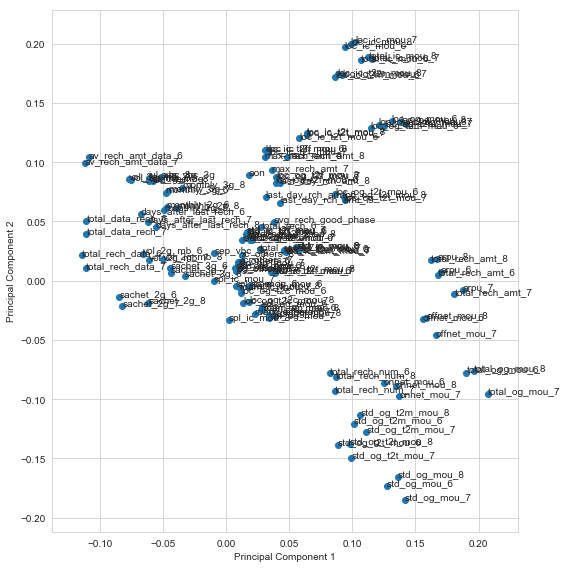

In [96]:
#Plotting the principal components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [97]:
#Checking the variance of the principal components
pca.explained_variance_ratio_

array([1.12218681e-01, 8.46767152e-02, 4.95281990e-02, 4.36632096e-02,
       4.30843199e-02, 3.34165618e-02, 2.78388110e-02, 2.72462140e-02,
       2.48988844e-02, 2.40183988e-02, 2.13910553e-02, 2.07935085e-02,
       2.06832043e-02, 2.03171230e-02, 1.86106224e-02, 1.76404515e-02,
       1.69676747e-02, 1.66497147e-02, 1.46114476e-02, 1.36523280e-02,
       1.31659072e-02, 1.30229121e-02, 1.21725212e-02, 1.13320411e-02,
       1.12216817e-02, 1.07594533e-02, 1.03079265e-02, 9.04194395e-03,
       8.73195401e-03, 8.42743130e-03, 8.04035140e-03, 7.58198402e-03,
       7.24207205e-03, 7.19901987e-03, 7.09145259e-03, 6.58448940e-03,
       6.38532471e-03, 6.33055224e-03, 6.11849125e-03, 6.05668800e-03,
       5.78672253e-03, 5.69484186e-03, 5.41722309e-03, 5.31095811e-03,
       5.16221415e-03, 5.06989237e-03, 4.88872418e-03, 4.80482478e-03,
       4.74836942e-03, 4.56916245e-03, 4.37111656e-03, 4.29938536e-03,
       4.08492722e-03, 3.80907387e-03, 3.74269772e-03, 3.66761851e-03,
      

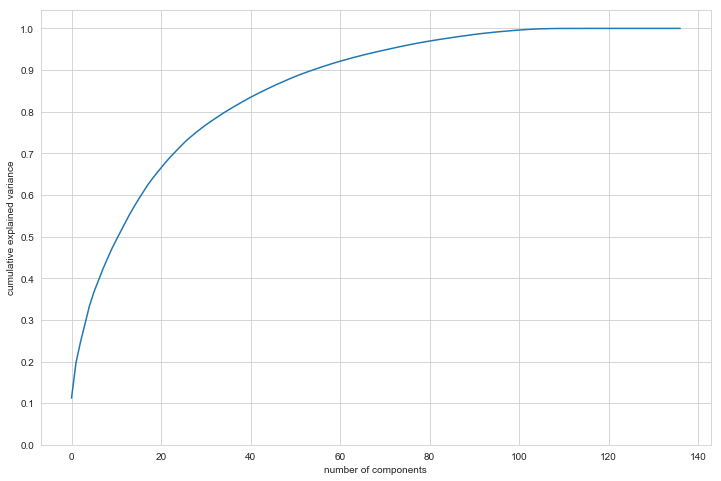

In [98]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

In [99]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [100]:
#Fitting pca on train data set
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(18956, 50)

In [101]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

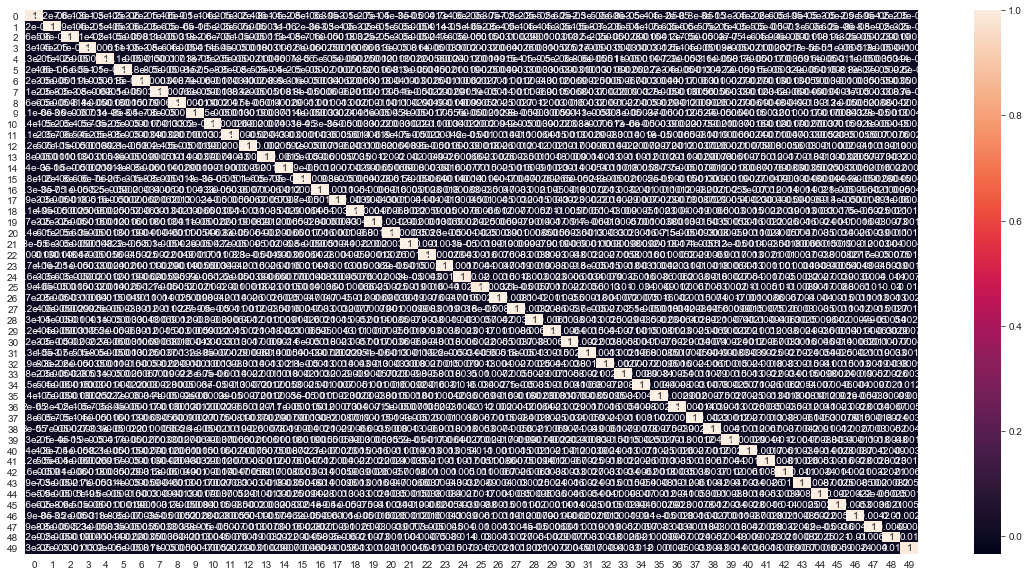

In [102]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [103]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.021182624351948176 , min corr:  -0.03364465746012167


In [104]:
#Applying selected components to the test data set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8124, 50)

### Treating Class Imbalance

In [105]:
#Importing required libraries
from imblearn.over_sampling import SMOTE

In [106]:
#Creating SMOTE
smote = SMOTE(kind = "regular")

#Applying smote on train data set
X_smote,y_smote = smote.fit_sample(X_train_pca,y_train)

In [107]:
#Checking the churn ratio 
churn_ratio = (sum(y_smote)/len(y_smote))*100
churn_ratio

50.0

### Logistic Regression on Principal Components

In [108]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Applyin the logistic regression model on the train data
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_smote,y_smote)

In [109]:
#Checking the accuracy of logistic regression model
y_train_pred = model_pca.predict_proba(X_smote)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_smote, y_train_pred))

'0.89'

### Decision Tree Algorithm

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [111]:
#Checking the accurcay of decision tree model
y_train_pred = dtree.predict_proba(X_train)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.91'

### Hyperparameter Tuning - Decision Tree Algorithm

In [112]:
# Creating the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                        

In [113]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.753357,0.209034,0.008401,0.001356,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.945148,0.940928,0.943038,0.943008,0.943008,0.943026,0.001335,3
1,2.767558,0.138938,0.008400,0.001357,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.945148,0.940928,0.943038,0.943008,0.943008,0.943026,0.001335,3
2,2.961169,0.448977,0.007400,0.000490,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943038,0.940137,0.944357,0.943272,0.943536,0.942868,0.001436,5
3,2.893566,0.281711,0.007800,0.000400,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943038,0.940137,0.944357,0.943272,0.943536,0.942868,0.001436,5
4,4.428253,0.517987,0.007601,0.000490,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.944620,0.940137,0.941983,0.938259,0.942480,0.941496,0.002158,15


In [114]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9432369698248576
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [115]:
# model with optimal hyperparameters 
# building the final decision tree model with the best perameters obtained from grid search
clf_gini = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50,
                                  class_weight={1:0.9,0:0.1}
                                 )
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [116]:
# accuracy score on test data set
clf_gini.score(X_test,y_test)

0.8670605612998523

### Logistic regression for identifying important indicators of churn.

In [117]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Applyin the logistic regression model on the train data
learner = LogisticRegression(random_state=100,class_weight='balanced')
model = learner.fit(X_train,y_train)

In [118]:
# Import 'LogisticRegression' and create a LogisticRegression object
logreg = LogisticRegression(random_state=100, class_weight='balanced')

In [119]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 76),
 ('arpu_7', True, 1),
 ('arpu_8', False, 9),
 ('onnet_mou_6', False, 65),
 ('onnet_mou_7', False, 58),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 17),
 ('offnet_mou_8', False, 114),
 ('roam_ic_mou_6', False, 74),
 ('roam_ic_mou_7', False, 41),
 ('roam_ic_mou_8', False, 95),
 ('roam_og_mou_6', False, 64),
 ('roam_og_mou_7', False, 28),
 ('roam_og_mou_8', False, 81),
 ('loc_og_t2t_mou_6', False, 98),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 117),
 ('loc_og_t2m_mou_6', False, 5),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 77),
 ('loc_og_t2f_mou_7', False, 60),
 ('loc_og_t2f_mou_8', False, 94),
 ('loc_og_t2c_mou_6', False, 66),
 ('loc_og_t2c_mou_7', False, 85),
 ('loc_og_t2c_mou_8', False, 86),
 ('loc_og_mou_6', False, 32),
 ('loc_og_mou_7', False, 2),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 63),
 ('std_og_t2t_mou_7', False, 51),
 ('std_og_t2t

In [121]:
col = X_train.columns[rfe.support_]

In [122]:
# X_train columns which doesn't support RFE
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_data_rech_6',
       'total_data_rech_7', 'total_rech_6', 'total_rech_7',
       'avg_rech_good_phase', 'days_after_last_rech_6',
       'days_after_last_rech_7'],
      dtype='object', length=117)

In [123]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [124]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                18956
Model:                            GLM   Df Residuals:                    18935
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3205.7
Date:                Mon, 19 Aug 2019   Deviance:                       6411.5
Time:                        22:29:24   Pearson chi2:                 2.93e+05
No. Iterations:                     9   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.2547      0.085    -50.080      0.000      -4.421      -4.088
arpu_7                     0.3727      0.038      9.867      0.000       0.299       0.447
onnet_mou_8                0.5191      0.169      3.068      0.002       0.188       0.851
offnet_mou_6               0.2588      0.032      7.981      0.000       0.195       0.322
loc_og_t2t_mou_7           0.1386      0.089      1.565      0.118      -0.035       0.312
loc_og_t2m_mou_8          -0.0513      0.200     -0.256      0.798      -0.444       0.341
loc_og_mou_8              -0.3132      0.213     -1.473      0.141      -0.730       0.103
std_og_t2m_mou_8           0.2127      0.171      1.246      0.213      -0.122       0.547
total_og_mou_8            -1.1844      0.265     -4.466      0.000      -1.704      -0.665
loc_ic_mou_8               1.9507      0.294      6.628      0.000       1.374       2.528
std_ic_mou_8               1.4039      0.151      9.326      0.000       1.109       1.699
total_ic_mou_7             0.4863      0.074      6.597      0.000       0.342       0.631
total_ic_mou_8            -4.5896      0.345    -13.306      0.000      -5.266      -3.914
spl_ic_mou_8              -0.5620      0.102     -5.492      0.000      -0.763      -0.361
isd_ic_mou_8               0.6892      0.075      9.209      0.000       0.543       0.836
last_day_rch_amt_8        -0.4530      0.060     -7.559      0.000      -0.570      -0.336
vol_2g_mb_8               -0.6006      0.092     -6.505      0.000      -0.782      -0.420
vol_3g_mb_8               -0.7506      0.080     -9.331      0.000      -0.908      -0.593
monthly_2g_8              -0.3179      0.080     -3.967      0.000      -0.475      -0.161
sep_vbc_3g                -0.8220      0.250     -3.286      0.001      -1.312      -0.332
days_after_last_rech_8     0.3290      0.028     11.950      0.000       0.275       0.383
==========================================================================================
"""

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_ic_mou_8,176.70
8,loc_ic_mou_8,126.83
7,total_og_mou_8,116.27
1,onnet_mou_8,50.37
6,std_og_t2m_mou_8,41.86
9,std_ic_mou_8,27.80
4,loc_og_t2m_mou_8,18.50
5,loc_og_mou_8,10.19
13,isd_ic_mou_8,5.95
3,loc_og_t2t_mou_7,3.61


## Making Prediction  - Train Data Set

In [126]:
X_train.shape

(18956, 20)

In [127]:
#Making prediction on the train data

#X_train = sm.add_constant(X_train_sm)
y_train_pred = res.predict(X_train_sm)
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.9'

In [128]:
# Converting to dataframe
y_train = pd.DataFrame(y_train)
y_train_original = y_train

In [129]:
# Converting to dataframe
y_train_pred = pd.DataFrame(y_train_pred)

In [130]:
# Putting mobile number to index
y_train['mobile_number'] = y_train.index

In [131]:
#Renaming the column
y_train_pred=y_train_pred.rename(columns={0:'churn_prob'})

In [132]:
# Removing index for both dataframes to append them side by side 
y_train_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [133]:
# Concatenating the data frames
y_train_pred_final = pd.concat([y_train, y_train_pred],axis=1)

In [134]:
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={ 0 : 'churned'})

In [135]:
#Checking the head of the data frame
y_train_pred_final.head()

,churned,mobile_number,churn_prob
0,0,22814,0.001192
1,0,61187,0.170136
2,0,77048,0.013549
3,0,91122,0.025886
4,0,9760,0.151599


In [136]:
# Rearranging the columns
y_train_pred_final = y_train_pred_final.reindex_axis(['mobile_number','churned','churn_prob'], axis=1)

In [137]:
## Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

#Checking the head of the data frame
y_train_pred_final.head()

,mobile_number,churned,churn_prob,predicted
0,22814,0,0.001192,0
1,61187,0,0.170136,0
2,77048,0,0.013549,0
3,91122,0,0.025886,0
4,9760,0,0.151599,0


### Checking the Metrics

In [138]:
#Importing required libraries
from sklearn import metrics

In [139]:
#Checking the metrics of the logistic regression model built

In [140]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final.predicted)
print(confusion)

[[17388   205]
 [  981   382]]


In [141]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churned, y_train_pred_final.predicted))

0.9374340578181051


In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
#Checking the sensitivity
TP / float(TP+FN)

0.2802641232575202

In [144]:
#Checking the specificity
TN / float(TN+FP)

0.9883476382652191

In [145]:
# Checking the false postive rate 
print(FP/ float(TN+FP))

0.011652361734780878


In [146]:
#Checking the positive predictive value 
print (TP / float(TP+FP))

0.6507666098807495


In [147]:
#Checking the Negative predictive value
print (TN / float(TN+ FN))

0.9465948064674179


### Plotting ROC Curve

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churned, y_train_pred_final.churn_prob, drop_intermediate = False )

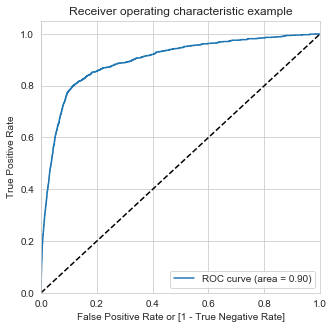

In [150]:
draw_roc(y_train_pred_final.churned, y_train_pred_final.churn_prob)

### Finding Optimal Cutoff Point

In [151]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,mobile_number,churned,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,22814,0,0.001192,0,1,0,0,0,0,0,0,0,0,0
1,61187,0,0.170136,0,1,1,0,0,0,0,0,0,0,0
2,77048,0,0.013549,0,1,0,0,0,0,0,0,0,0,0
3,91122,0,0.025886,0,1,0,0,0,0,0,0,0,0,0
4,9760,0,0.151599,0,1,1,0,0,0,0,0,0,0,0


In [152]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churned,y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.071903  1.000000  0.000000
0.1   0.1  0.864739  0.812179  0.868811
0.2   0.2  0.923454  0.613353  0.947479
0.3   0.3  0.933267  0.438004  0.971636
0.4   0.4  0.936221  0.340426  0.982379
0.5   0.5  0.937434  0.280264  0.988348
0.6   0.6  0.937751  0.222304  0.993179
0.7   0.7  0.935957  0.154806  0.996476
0.8   0.8  0.933478  0.093910  0.998522
0.9   0.9  0.930207  0.032282  0.999773


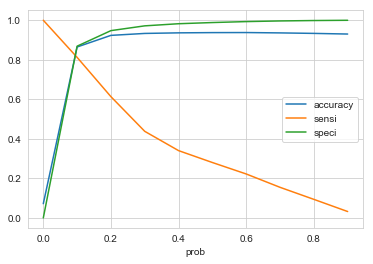

In [153]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [154]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.15 else 0)

y_train_pred_final.head()

,mobile_number,churned,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,22814,0,0.001192,0,1,0,0,0,0,0,0,0,0,0,0
1,61187,0,0.170136,0,1,1,0,0,0,0,0,0,0,0,1
2,77048,0,0.013549,0,1,0,0,0,0,0,0,0,0,0,0
3,91122,0,0.025886,0,1,0,0,0,0,0,0,0,0,0,0
4,9760,0,0.151599,0,1,1,0,0,0,0,0,0,0,0,1


In [155]:
#Checking the overall accuracy with new probability cutoff.
metrics.accuracy_score(y_train_pred_final.churned, y_train_pred_final.final_Predicted)

0.9061510867271576

In [156]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final.final_Predicted )
confusion2

array([[16187,  1406],
       [  373,   990]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
#Checking the sensitivity
TP / float(TP+FN)

0.7263389581804842

In [159]:
#Calculating specificity
TN / float(TN+FP)

0.9200818507360882

In [160]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.07991814926391179


In [161]:
#Calculating positive predictive value 
print (TP / float(TP+FP))

0.41318864774624375


In [162]:
#Calculating Negative predictive value
print (TN / float(TN+ FN))

0.977475845410628


#### Precision and Recall

In [163]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final.predicted )
confusion

array([[17388,   205],
       [  981,   382]], dtype=int64)

In [164]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6507666098807495

In [165]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.2802641232575202

In [166]:
#Importing required libraries
from sklearn.metrics import precision_score, recall_score

In [167]:
#Checking precision score
precision_score(y_train_pred_final.churned, y_train_pred_final.predicted)

0.6507666098807495

In [168]:
#Checking recall score
recall_score(y_train_pred_final.churned, y_train_pred_final.predicted)

0.2802641232575202

## Precision - Recall Tradeoff

In [169]:
#Importing required libraries
from sklearn.metrics import precision_recall_curve

In [170]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churned, y_train_pred_final.churn_prob)

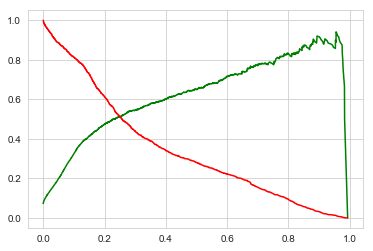

In [171]:
#Plotting precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [172]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,mobile_number,churned,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,final_predicted
0,22814,0,0.001192,0,1,0,0,0,0,0,0,0,0,0,0,0
1,61187,0,0.170136,0,1,1,0,0,0,0,0,0,0,0,1,0
2,77048,0,0.013549,0,1,0,0,0,0,0,0,0,0,0,0,0
3,91122,0,0.025886,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9760,0,0.151599,0,1,1,0,0,0,0,0,0,0,0,1,0


In [173]:
#Checking the overall accuracy with new probability cutoff.
metrics.accuracy_score(y_train_pred_final.churned, y_train_pred_final.final_predicted)

0.9330027431947668

In [174]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.churned, y_train_pred_final.final_predicted )
confusion2

array([[17045,   548],
       [  722,   641]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
#Checking the sensitivity
TP / float(TP+FN)

0.4702861335289802

In [177]:
#Calculating specificity
TN / float(TN+FP)

0.9688512476553175

In [178]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.031148752344682545


In [179]:
#Calculating positive predictive value 
print (TP / float(TP+FP))

0.5391084945332212


In [180]:
#Calculating Negative predictive value
print (TN / float(TN+ FN))

0.95936286373614


### Making Predictions - Test Data Set

In [181]:
col

Index(['arpu_7', 'onnet_mou_8', 'offnet_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sep_vbc_3g',
       'days_after_last_rech_8'],
      dtype='object')

In [182]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test.shape

(8124, 20)

In [183]:
y_test.head()

8551     0
60978    0
38501    0
94604    0
69613    0
Name: churned, dtype: int64

In [184]:
#Making prediction on the test data
y_test_pred = res.predict(X_test_sm)
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.9'

In [185]:
# Converting to dataframe
y_test = pd.DataFrame(y_test)

In [186]:
# Converting to dataframe
y_test_pred = pd.DataFrame(y_test_pred)

In [187]:
# Putting mobile number to index
y_test['mobile_number'] = y_test.index

In [188]:
#Renaming the column
y_test_pred=y_test_pred.rename(columns={0:'churn_prob'})

In [189]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [190]:
# Concatenating the data frames
y_test_pred_final = pd.concat([y_test, y_test_pred],axis=1)

In [191]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'churned'})

In [192]:
#Checking the head of the data frame
y_test_pred_final.head()

,churned,mobile_number,churn_prob
0,0,8551,0.001295
1,0,60978,0.002118
2,0,38501,0.002134
3,0,94604,0.101671
4,0,69613,0.028455


In [193]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex_axis(['mobile_number','churned','churn_prob'], axis=1)

In [194]:
## Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

#Checking the head of the data frame
y_test_pred_final.head()

,mobile_number,churned,churn_prob,predicted
0,8551,0,0.001295,0
1,60978,0,0.002118,0
2,38501,0,0.002134,0
3,94604,0,0.101671,0
4,69613,0,0.028455,0


### Checking the Metrics

In [195]:
#Importing required libraries
from sklearn import metrics

In [196]:
#Checking the metrics of the logistic regression model built

In [197]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.churned, y_test_pred_final.predicted)
print(confusion)

[[7449   85]
 [ 402  188]]


In [198]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.churned, y_test_pred_final.predicted))

0.940054160512063


In [199]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [200]:
#Checking the sensitivity
TP / float(TP+FN)

0.31864406779661014

In [201]:
#Checking the specificity
TN / float(TN+FP)

0.9887178125829572

In [202]:
# Checking the false postive rate 
print(FP/ float(TN+FP))

0.01128218741704274


In [203]:
#Checking the positive predictive value 
print (TP / float(TP+FP))

0.6886446886446886


In [204]:
#Checking the Negative predictive value
print (TN / float(TN+ FN))

0.9487963316774933


In [205]:
col

Index(['arpu_7', 'onnet_mou_8', 'offnet_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sep_vbc_3g',
       'days_after_last_rech_8'],
      dtype='object')

In [208]:
# Below are the important features which are the cause of churn
vals=['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','onnet_mou_8','total_ic_mou_7',
      'arpu_7','days_after_last_rech_8','offnet_mou_6','std_og_t2m_mou_8','loc_og_t2t_mou_7']

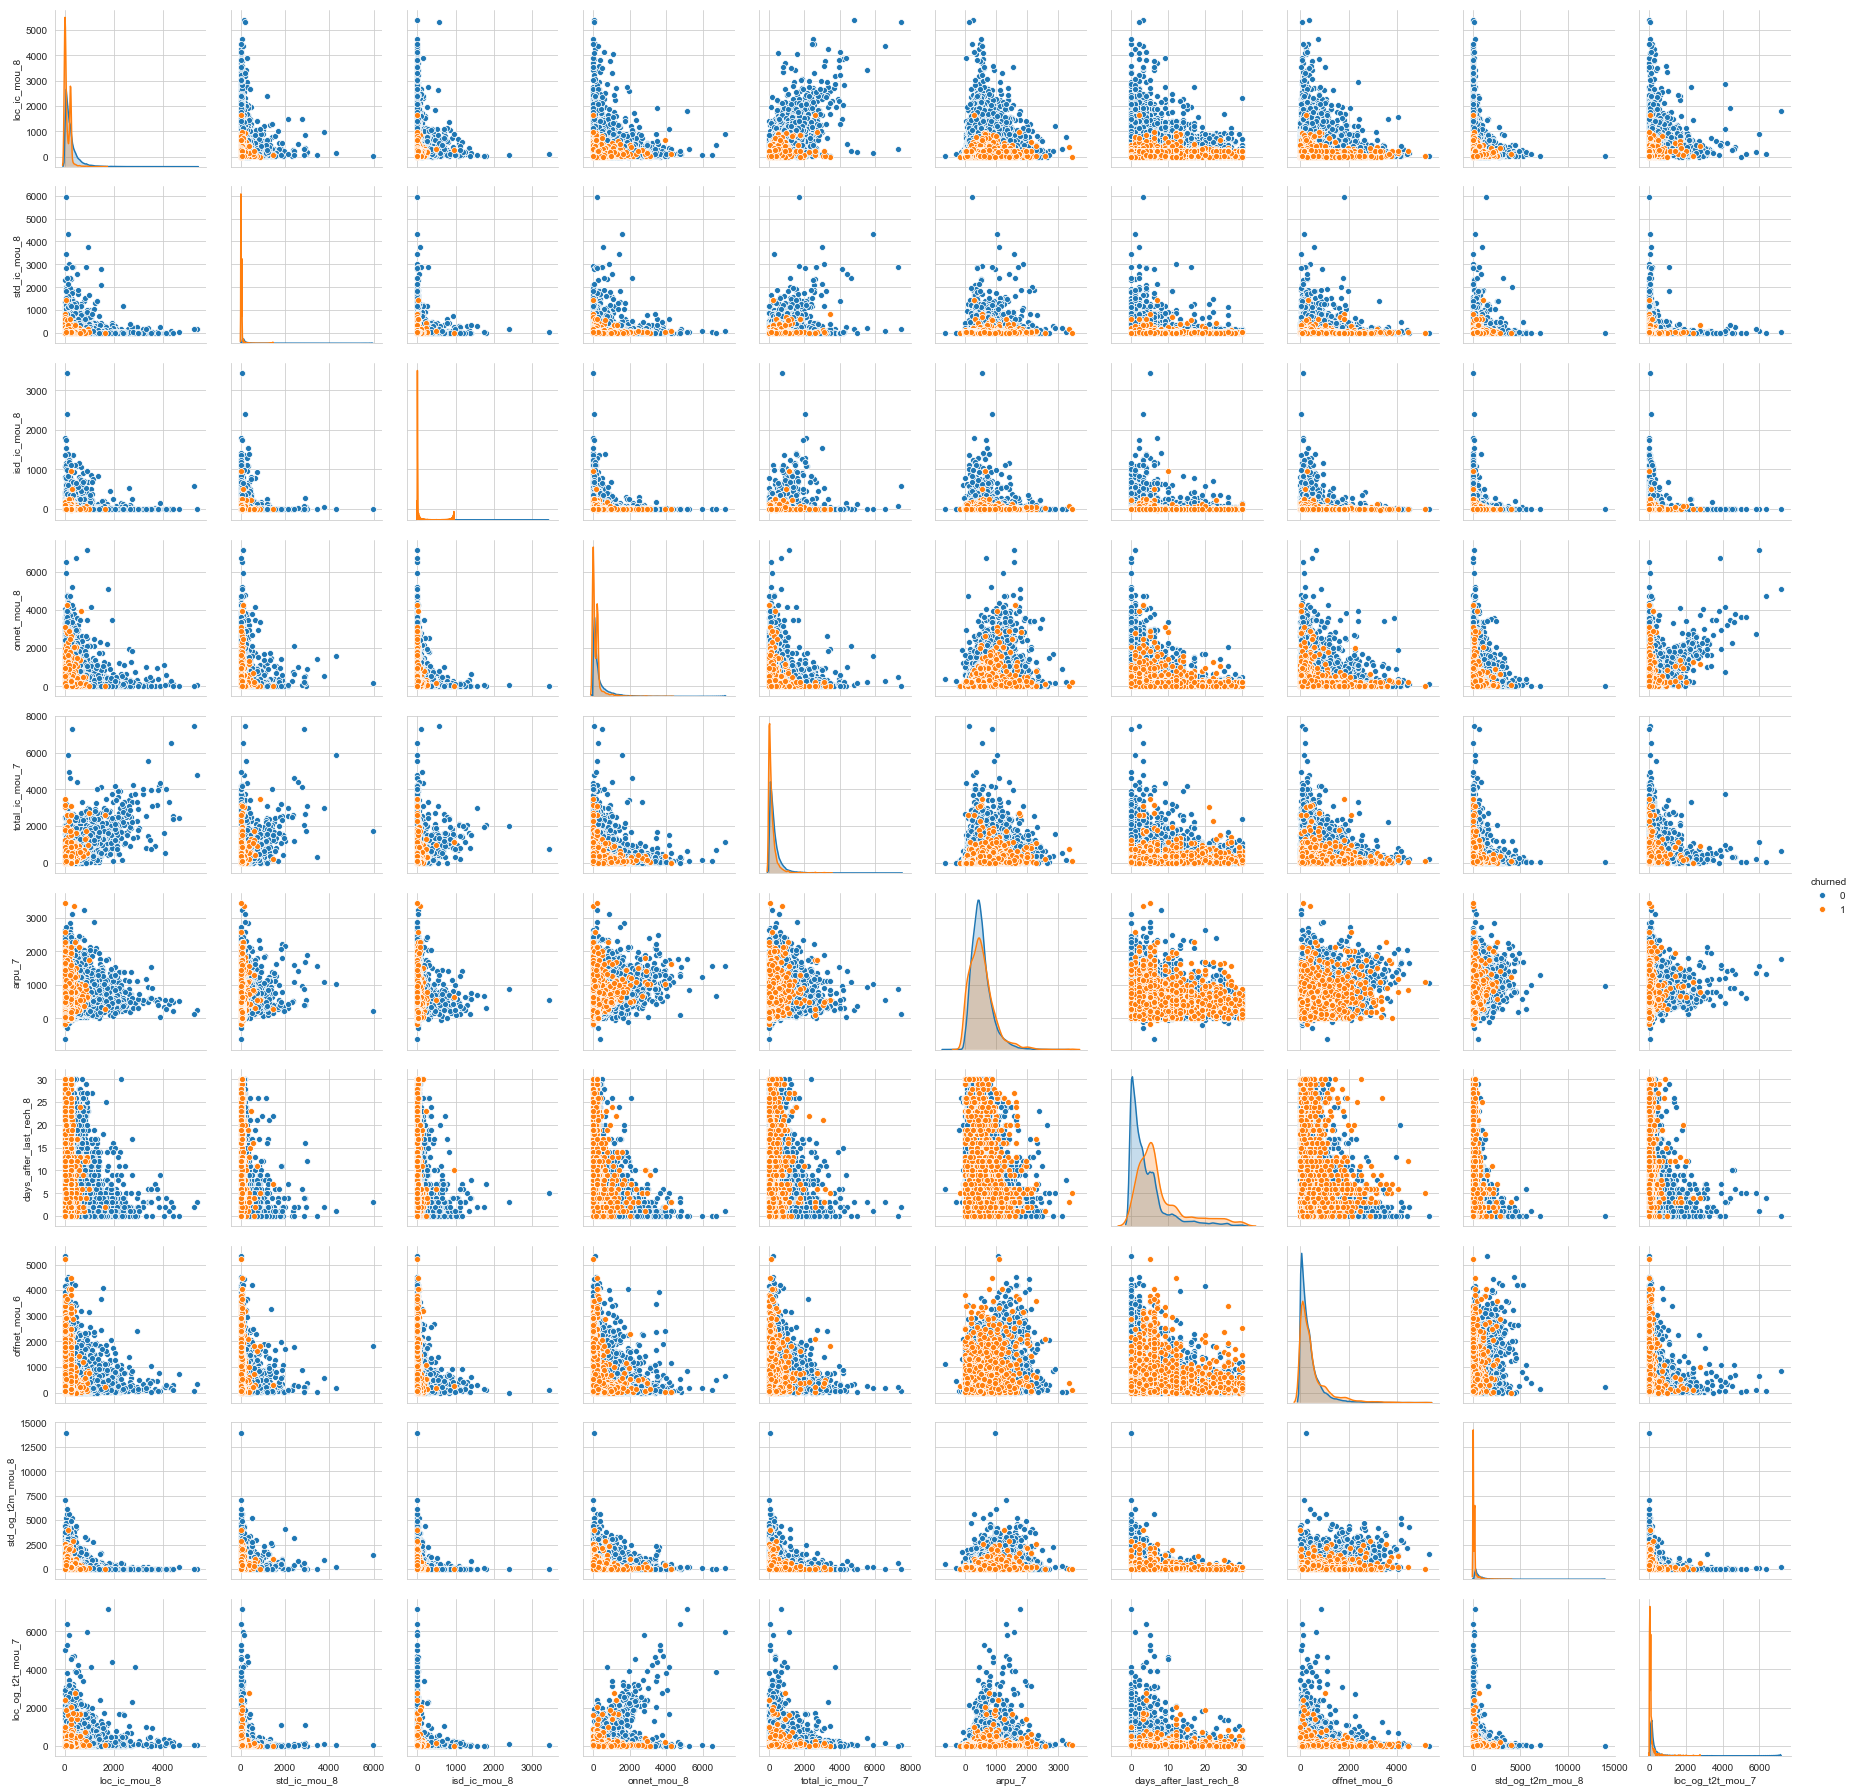

In [209]:
# A pair plot visually describing the features which cause churn with the output variable
sns.pairplot(telecom,vars=vals,hue='churned')

In [211]:
telecom[vals].describe()

,loc_ic_mou_8,std_ic_mou_8,isd_ic_mou_8,onnet_mou_8,total_ic_mou_7,arpu_7,days_after_last_rech_8,offnet_mou_6,std_og_t2m_mou_8,loc_og_t2t_mou_7
count,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000
mean,233.235694,46.219018,10.906400,246.243270,298.272698,532.013649,4.392799,377.159369,165.092607,87.993472
std,305.592370,137.546707,65.940796,436.649165,370.854470,323.182976,5.328268,448.237108,390.588968,239.277463
min,0.000000,0.000000,-15.290638,0.000000,0.000000,-622.509000,0.000000,0.000000,0.000000,0.000000
25%,52.580000,1.130000,0.000000,17.230000,82.287500,314.716750,1.000000,85.637500,0.000000,5.930000
50%,145.870000,11.930000,0.000000,83.480000,190.850000,478.141000,3.000000,241.850000,16.560000,27.740000
75%,289.880000,45.830000,0.000000,255.310000,379.215000,678.314250,6.000000,490.470000,163.180000,86.140000
max,5388.740000,5957.140000,3432.880000,7174.580000,7442.860000,3443.226000,30.000000,5332.110000,13950.040000,7163.210000


### Recommendation

According to our prediction, we can conclude that following factors will be the possible indicators of churning:
1)loc_ic_mou_8
2)std_ic_mou_8
3)isd_ic_mou_8
4)onnet_mou_8
5)total_ic_mou_7
6)arpu_7
7)days_after_last_rech_8
8)offnet_mou_6
9)std_og_t2m_mou_8
10)loc_og_t2t_mou_7

So, if industry can focus more on these factors. It would be possible to reduce the churn rate.
